### Problem Statement : **Predict for how long an employee will be absent based on features given in the dataset.**

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("absenteeism_at_work/Absenteeism_at_work.csv")
dataset.head()

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours
0  11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                  
1  36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...                                                                                                                                                                                                                                                  
2  3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...                                                                                                                                                                                                                                                  
3  7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;6...                                                                                                                                                                                                                                                  
4  11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;...

In [4]:
dataset.shape

(740, 1)

In [5]:
for index, row in dataset.iterrows():
    print(row)

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours    11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...
Name: 0, dtype: object
ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours    36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...
Name: 1, dtype: object
ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass i

In [6]:
for index, row in dataset.iterrows():
    values = row['ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours'].split(';')
    dataset.loc[index, 'ID'] = values[0]
    dataset.loc[index, 'Reason for absence'] = values[1]
    dataset.loc[index, 'Month of absence'] = values[2]
    dataset.loc[index, 'Day of the week'] = values[3]
    dataset.loc[index, 'Seasons'] = values[4]
    dataset.loc[index, 'Transportation expense'] = values[5]
    dataset.loc[index, 'Distance from Residence to Work'] = values[6]
    dataset.loc[index, 'Service time'] = values[7]
    dataset.loc[index, 'Age'] = values[8]
    dataset.loc[index, 'Work load Average/day'] = values[9]
    dataset.loc[index, 'Hit target'] = values[10]
    dataset.loc[index, 'Disciplinary failure'] = values[11]
    dataset.loc[index, 'Education'] = values[12]
    dataset.loc[index, 'Son'] = values[13]
    dataset.loc[index, 'Social drinker'] = values[14]
    dataset.loc[index, 'Social smoker'] = values[15]
    dataset.loc[index, 'Pet'] = values[16]
    dataset.loc[index, 'Weight'] = values[17]
    dataset.loc[index, 'Height'] = values[18]
    dataset.loc[index, 'Body mass index'] = values[19]
    dataset.loc[index, 'Absenteeism time in hours'] = values[20]

In [7]:
dataset.head()

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours  \
0  11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                     
1  36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...                                                                                                                                                                                                                                                     
2  3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...                                                                                                                                                                                                                                                     
3  7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;6...                                                                                                                                                                                                                                                     
4  11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                     

   ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

  Transportation expense Distance from Residence to Work Service time Age  \
0                    289                              36           13  33   
1                    118                              13           18  50   
2                    179                              51           18  38   
3                    279                               5           14  39   
4                    289                              36           13  33   

   ... Disciplinary failure Education Son Social drinker Social smoker Pet  \
0  ...                    0         1   2              1             0   1   
1  ...                    1         1   1              1             0   0   
2  ...                    0         1   0              1             0   0   
3  ...                    0         1   2              1             1   0   
4  ...                    0         1   2              1             0   1   

  Weight Height Body mass index Absenteeism time in hours  
0     90    172              30                         4  
1     98    178              31                         0  
2     89    170              31                         2  
3     68    168              24                         4  
4     90    172              30                         2  

[5 rows x 22 columns]

In [8]:
df = dataset.drop(columns = 'ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours')

In [9]:
df.head()

ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

  Transportation expense Distance from Residence to Work Service time Age  \
0                    289                              36           13  33   
1                    118                              13           18  50   
2                    179                              51           18  38   
3                    279                               5           14  39   
4                    289                              36           13  33   

  Work load Average/day  ... Disciplinary failure Education Son  \
0               239.554  ...                    0         1   2   
1               239.554  ...                    1         1   1   
2               239.554  ...                    0         1   0   
3               239.554  ...                    0         1   2   
4               239.554  ...                    0         1   2   

  Social drinker Social smoker Pet Weight Height Body mass index  \
0              1             0   1     90    172              30   
1              1             0   0     98    178              31   
2              1             0   0     89    170              31   
3              1             1   0     68    168              24   
4              1             0   1     90    172              30   

  Absenteeism time in hours  
0                         4  
1                         0  
2                         2  
3                         4  
4                         2  

[5 rows x 21 columns]

In [10]:
df.shape

(740, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    object
 1   Reason for absence               740 non-null    object
 2   Month of absence                 740 non-null    object
 3   Day of the week                  740 non-null    object
 4   Seasons                          740 non-null    object
 5   Transportation expense           740 non-null    object
 6   Distance from Residence to Work  740 non-null    object
 7   Service time                     740 non-null    object
 8   Age                              740 non-null    object
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    object
 11  Disciplinary failure             740 non-null    object
 12  Education                        740

In [12]:
df['ID'] = dataset['ID'].astype(float)
df['Reason for absence'] = dataset['Reason for absence'].astype(float)
df['Day of the week'] = dataset['Day of the week'].astype(float)
df['Month of absence'] = dataset['Month of absence'].astype(float)
df['Seasons'] = dataset['Seasons'].astype(float)
df['Transportation expense'] = dataset['Transportation expense'].astype(float)
df['Distance from Residence to Work'] = dataset['Distance from Residence to Work'].astype(float)
df['Service time'] = dataset['Service time'].astype(float)
df['Age'] = dataset['Age'].astype(int)
df['Work load Average/day'] = df['Work load Average/day'].astype(float)
df['Hit target'] = dataset['Hit target'].astype(float)
df['Disciplinary failure'] = dataset['Disciplinary failure'].astype(float).astype(float)
df['Education'] = dataset['Education'].astype(float)
df['Son'] = dataset['Son'].astype(float)
#dataset['Social drinker']
#dataset['Social smoker']
df['Pet'] = dataset['Pet'].astype(float)
df['Weight'] = dataset['Weight'].astype(float)
df['Height'] = dataset['Height'].astype(float)
df['Body mass index'] = dataset['Body mass index'].astype(float)
df['Absenteeism time in hours'] = dataset['Absenteeism time in hours'].astype(float)

In [13]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                239.554  ...                   0.0        1.0  2.0   
1                239.554  ...                   1.0        1.0  1.0   
2                239.554  ...                   0.0        1.0  0.0   
3                239.554  ...                   0.0        1.0  2.0   
4                239.554  ...                   0.0        1.0  2.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [14]:
df['Work load Average/day'] = df['Work load Average/day']*1000

In [15]:
df.head(10)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   
5   3.0                23.0               7.0              6.0      1.0   
6  10.0                22.0               7.0              6.0      1.0   
7  20.0                23.0               7.0              6.0      1.0   
8  14.0                19.0               7.0              2.0      1.0   
9   1.0                22.0               7.0              2.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   
5                   179.0                             51.0          18.0   38   
6                   361.0                             52.0           3.0   28   
7                   260.0                             50.0          11.0   36   
8                   155.0                             12.0          14.0   34   
9                   235.0                             11.0          14.0   37   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0               239554.0  ...                   0.0        1.0  2.0   
1               239554.0  ...                   1.0        1.0  1.0   
2               239554.0  ...                   0.0        1.0  0.0   
3               239554.0  ...                   0.0        1.0  2.0   
4               239554.0  ...                   0.0        1.0  2.0   
5               239554.0  ...                   0.0        1.0  0.0   
6               239554.0  ...                   0.0        1.0  1.0   
7               239554.0  ...                   0.0        1.0  4.0   
8               239554.0  ...                   0.0        1.0  2.0   
9               239554.0  ...                   0.0        3.0  1.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   
5               1             0  0.0    89.0   170.0             31.0   
6               1             0  4.0    80.0   172.0             27.0   
7               1             0  0.0    65.0   168.0             23.0   
8               1             0  0.0    95.0   196.0             25.0   
9               0             0  1.0    88.0   172.0             29.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  
5                        2.0  
6                        8.0  
7                        4.0  
8                       40.0  
9                        8.0  

[10 rows x 21 columns]

In [16]:
df['Work load Average/day'] = df['Work load Average/day'].astype(int)

In [17]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                 239554  ...                   0.0        1.0  2.0   
1                 239554  ...                   1.0        1.0  1.0   
2                 239554  ...                   0.0        1.0  0.0   
3                 239554  ...                   0.0        1.0  2.0   
4                 239554  ...                   0.0        1.0  2.0   

   Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
0               1             0  1.0    90.0   172.0             30.0   
1               1             0  0.0    98.0   178.0             31.0   
2               1             0  0.0    89.0   170.0             31.0   
3               1             1  0.0    68.0   168.0             24.0   
4               1             0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    int32  
 9   Work load Average/day            740 non-null    int32  
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

In [19]:
print(df['Social drinker'].nunique())
print(df['Social smoker'].nunique())

2
2


In [20]:
df['Social drinker'] = np.where(df['Social drinker'] == '1' , 1.0 ,0.0)
df['Social smoker'] = np.where(df['Social smoker'] == '1' , 1.0 ,0.0)

In [21]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                   289.0                             36.0          13.0   33   
1                   118.0                             13.0          18.0   50   
2                   179.0                             51.0          18.0   38   
3                   279.0                              5.0          14.0   39   
4                   289.0                             36.0          13.0   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                 239554  ...                   0.0        1.0  2.0   
1                 239554  ...                   1.0        1.0  1.0   
2                 239554  ...                   0.0        1.0  0.0   
3                 239554  ...                   0.0        1.0  2.0   
4                 239554  ...                   0.0        1.0  2.0   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0             1.0            0.0  1.0    90.0   172.0             30.0   
1             1.0            0.0  0.0    98.0   178.0             31.0   
2             1.0            0.0  0.0    89.0   170.0             31.0   
3             1.0            1.0  0.0    68.0   168.0             24.0   
4             1.0            0.0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [22]:
df.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day  ...  \
count    740.000000  740.000000             740.000000  ...   
mean      12.554054   36.450000          271490.198649  ...   
std        4.384873    6.478772           39058.125528  ...   
min        1.000000   27.000000          205917.000000  ...   
25%        9.000000   31.000000          244387.000000  ...   
50%       13.000000   37.000000          264249.000000  ...   
75%       16.000000   40.000000          294217.000000  ...   
max       29.000000   58.000000          378884.000000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    int32  
 9   Work load Average/day            740 non-null    int32  
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

In [24]:
df.to_csv("absenteeism_at_work_converted.csv")

In [25]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [26]:
print(df.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

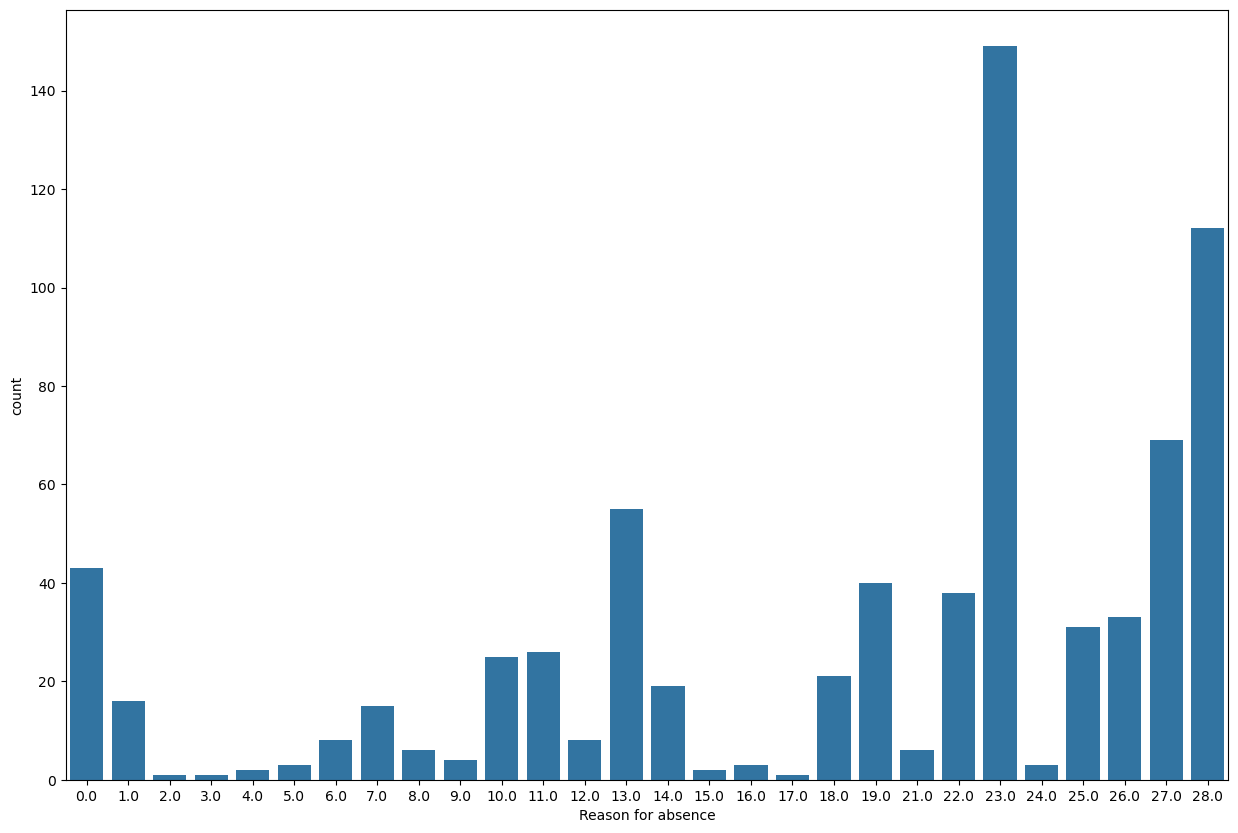

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(x='Reason for absence', data=df)
plt.show()

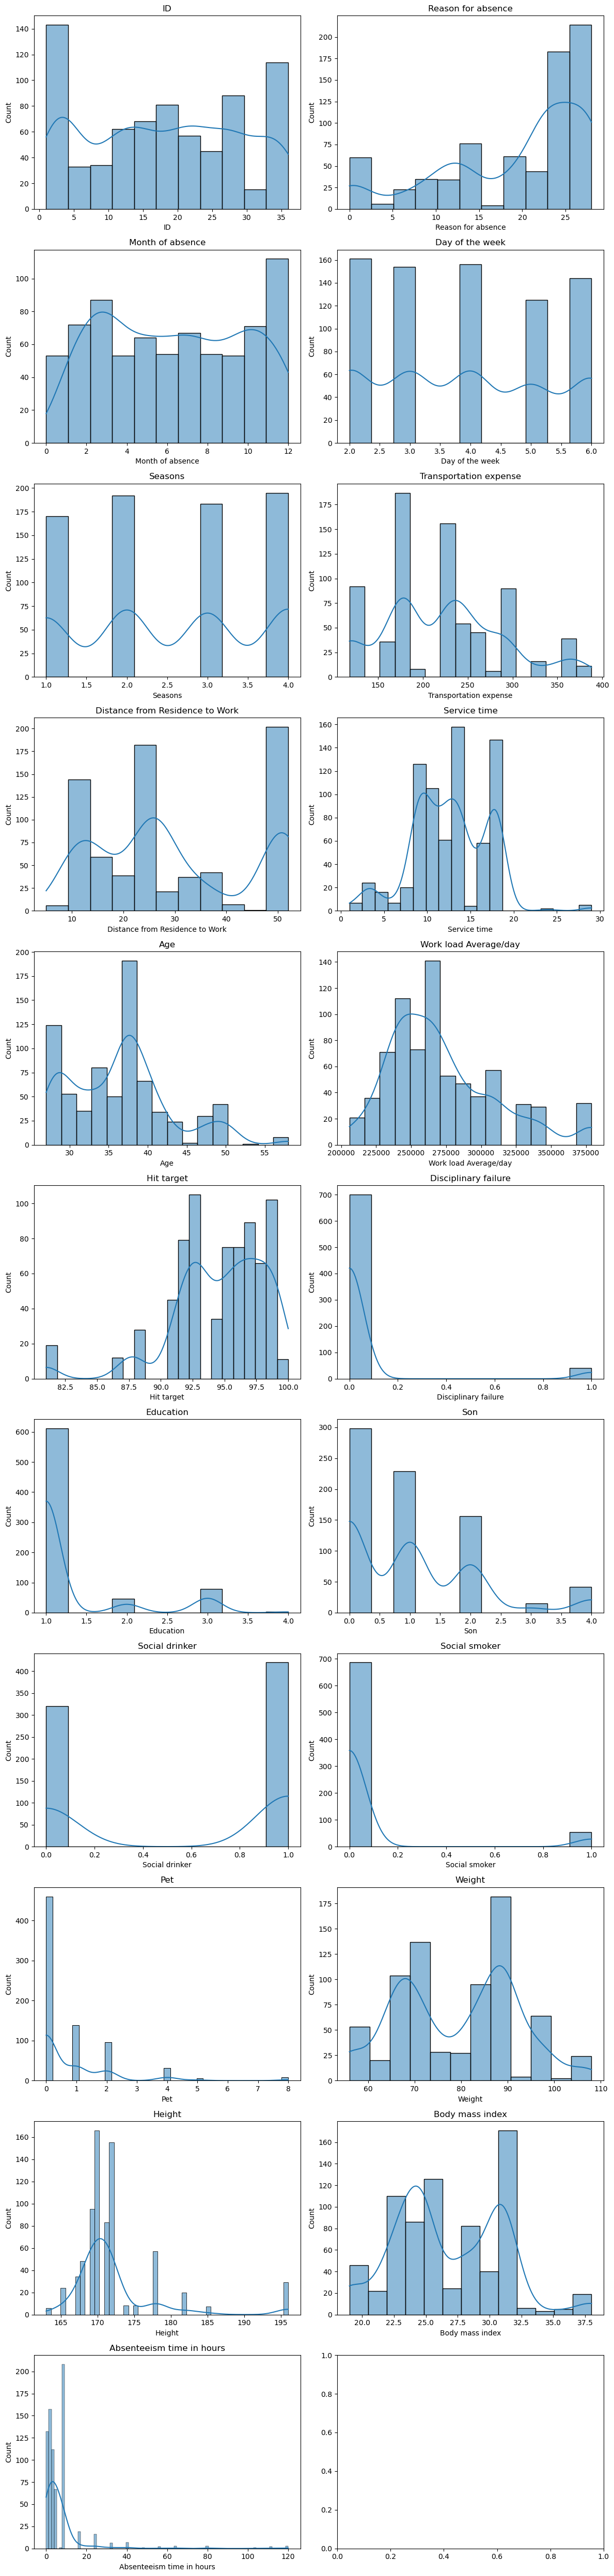

In [29]:
fig, axs = plt.subplots(nrows=len(df.columns) // 2 + 1, ncols=2, figsize=(12, 50))
for i, col in enumerate(df.columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(x=df[col], kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col)
plt.tight_layout()
plt.show()

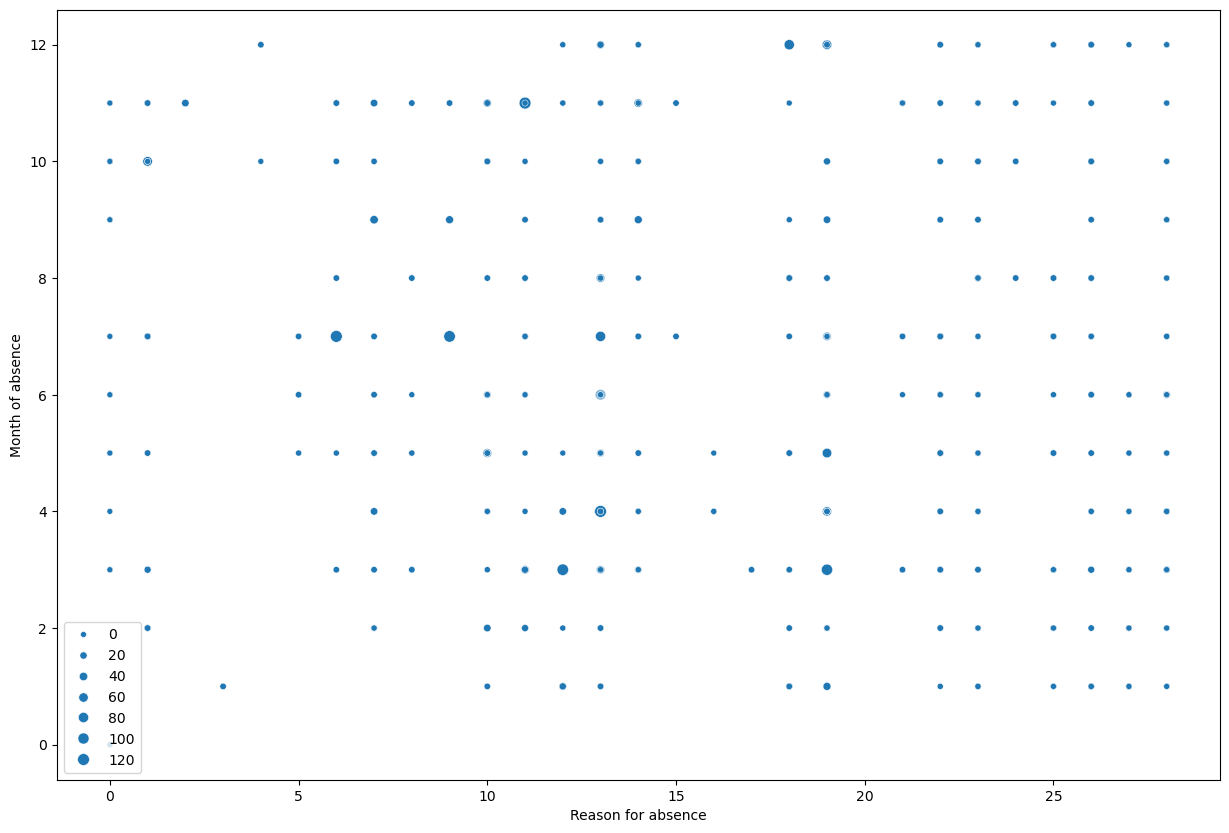

In [30]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'Reason for absence', y = 'Month of absence',size = 'Absenteeism time in hours')
plt.legend()
plt.show()

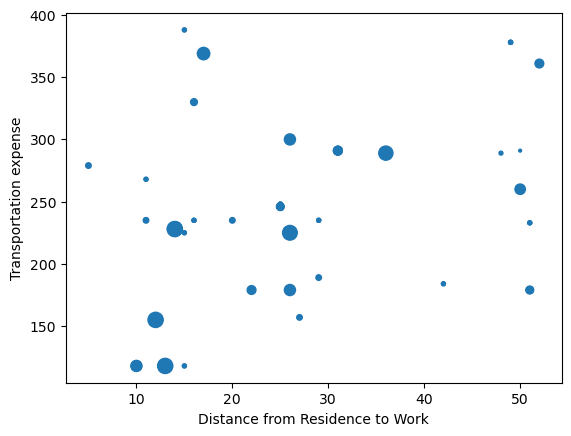

In [31]:
plt.scatter(df['Distance from Residence to Work'], df['Transportation expense'], s=df['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel("Transportation expense")
plt.show()

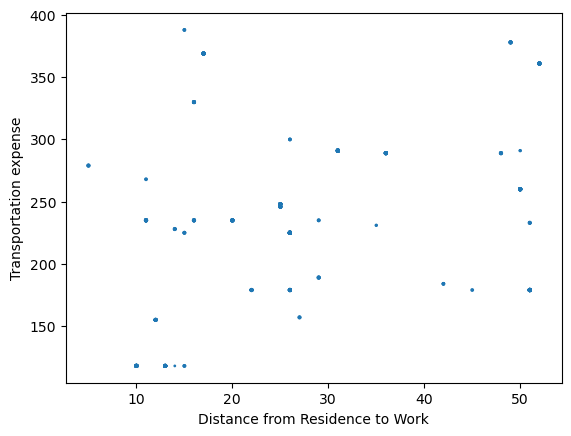

In [32]:
plt.scatter(df['Distance from Residence to Work'], df['Transportation expense'], s=df['Seasons'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel("Transportation expense")
plt.show()

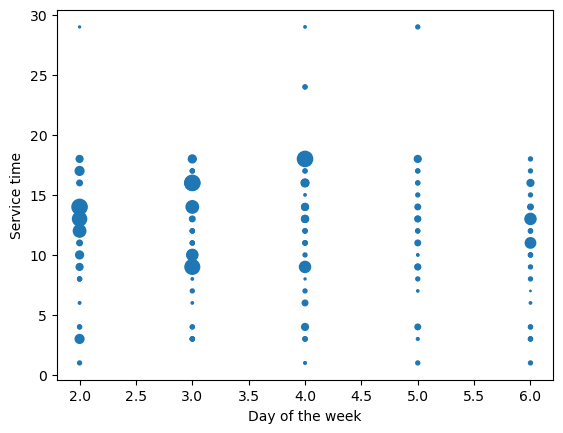

In [33]:
plt.scatter(df['Day of the week'], df['Service time'], s=df['Absenteeism time in hours'])
plt.xlabel('Day of the week')
plt.ylabel("Service time")
plt.show()

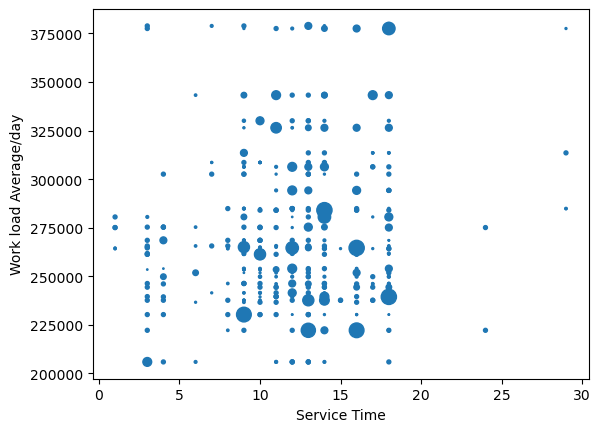

In [34]:
plt.scatter(df['Service time'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Service Time")
plt.ylabel('Work load Average/day')
plt.show()

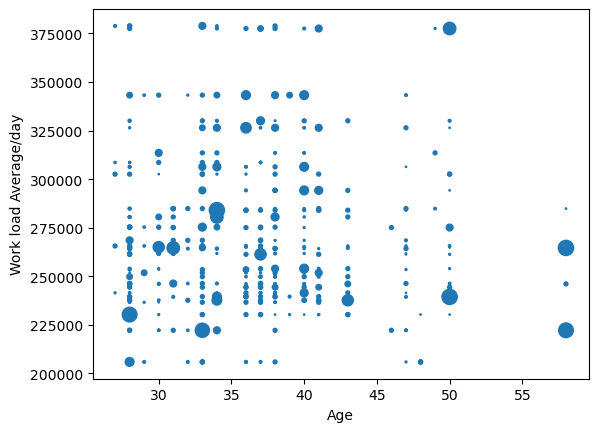

In [35]:
plt.scatter(df['Age'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Age")
plt.ylabel('Work load Average/day')
plt.show()

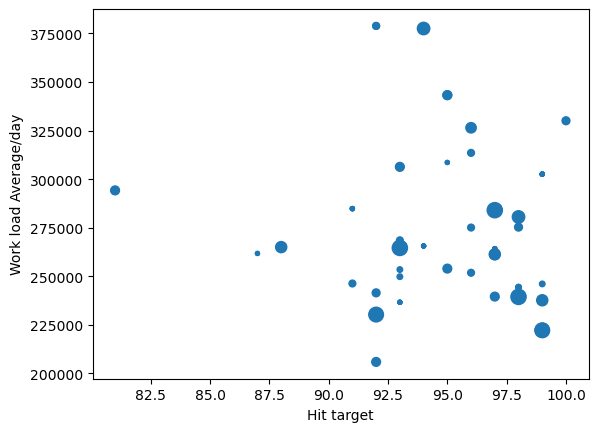

In [36]:
plt.scatter(df['Hit target'], df['Work load Average/day'], s=df['Absenteeism time in hours'])
plt.xlabel("Hit target")
plt.ylabel('Work load Average/day')
plt.show()

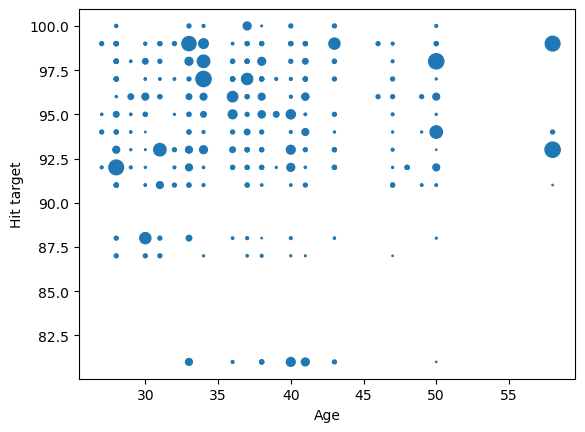

In [37]:
plt.scatter(df['Age'], df['Hit target'], s=df['Absenteeism time in hours'])
plt.xlabel('Age')
plt.ylabel("Hit target")
plt.show()

#### Pair plot

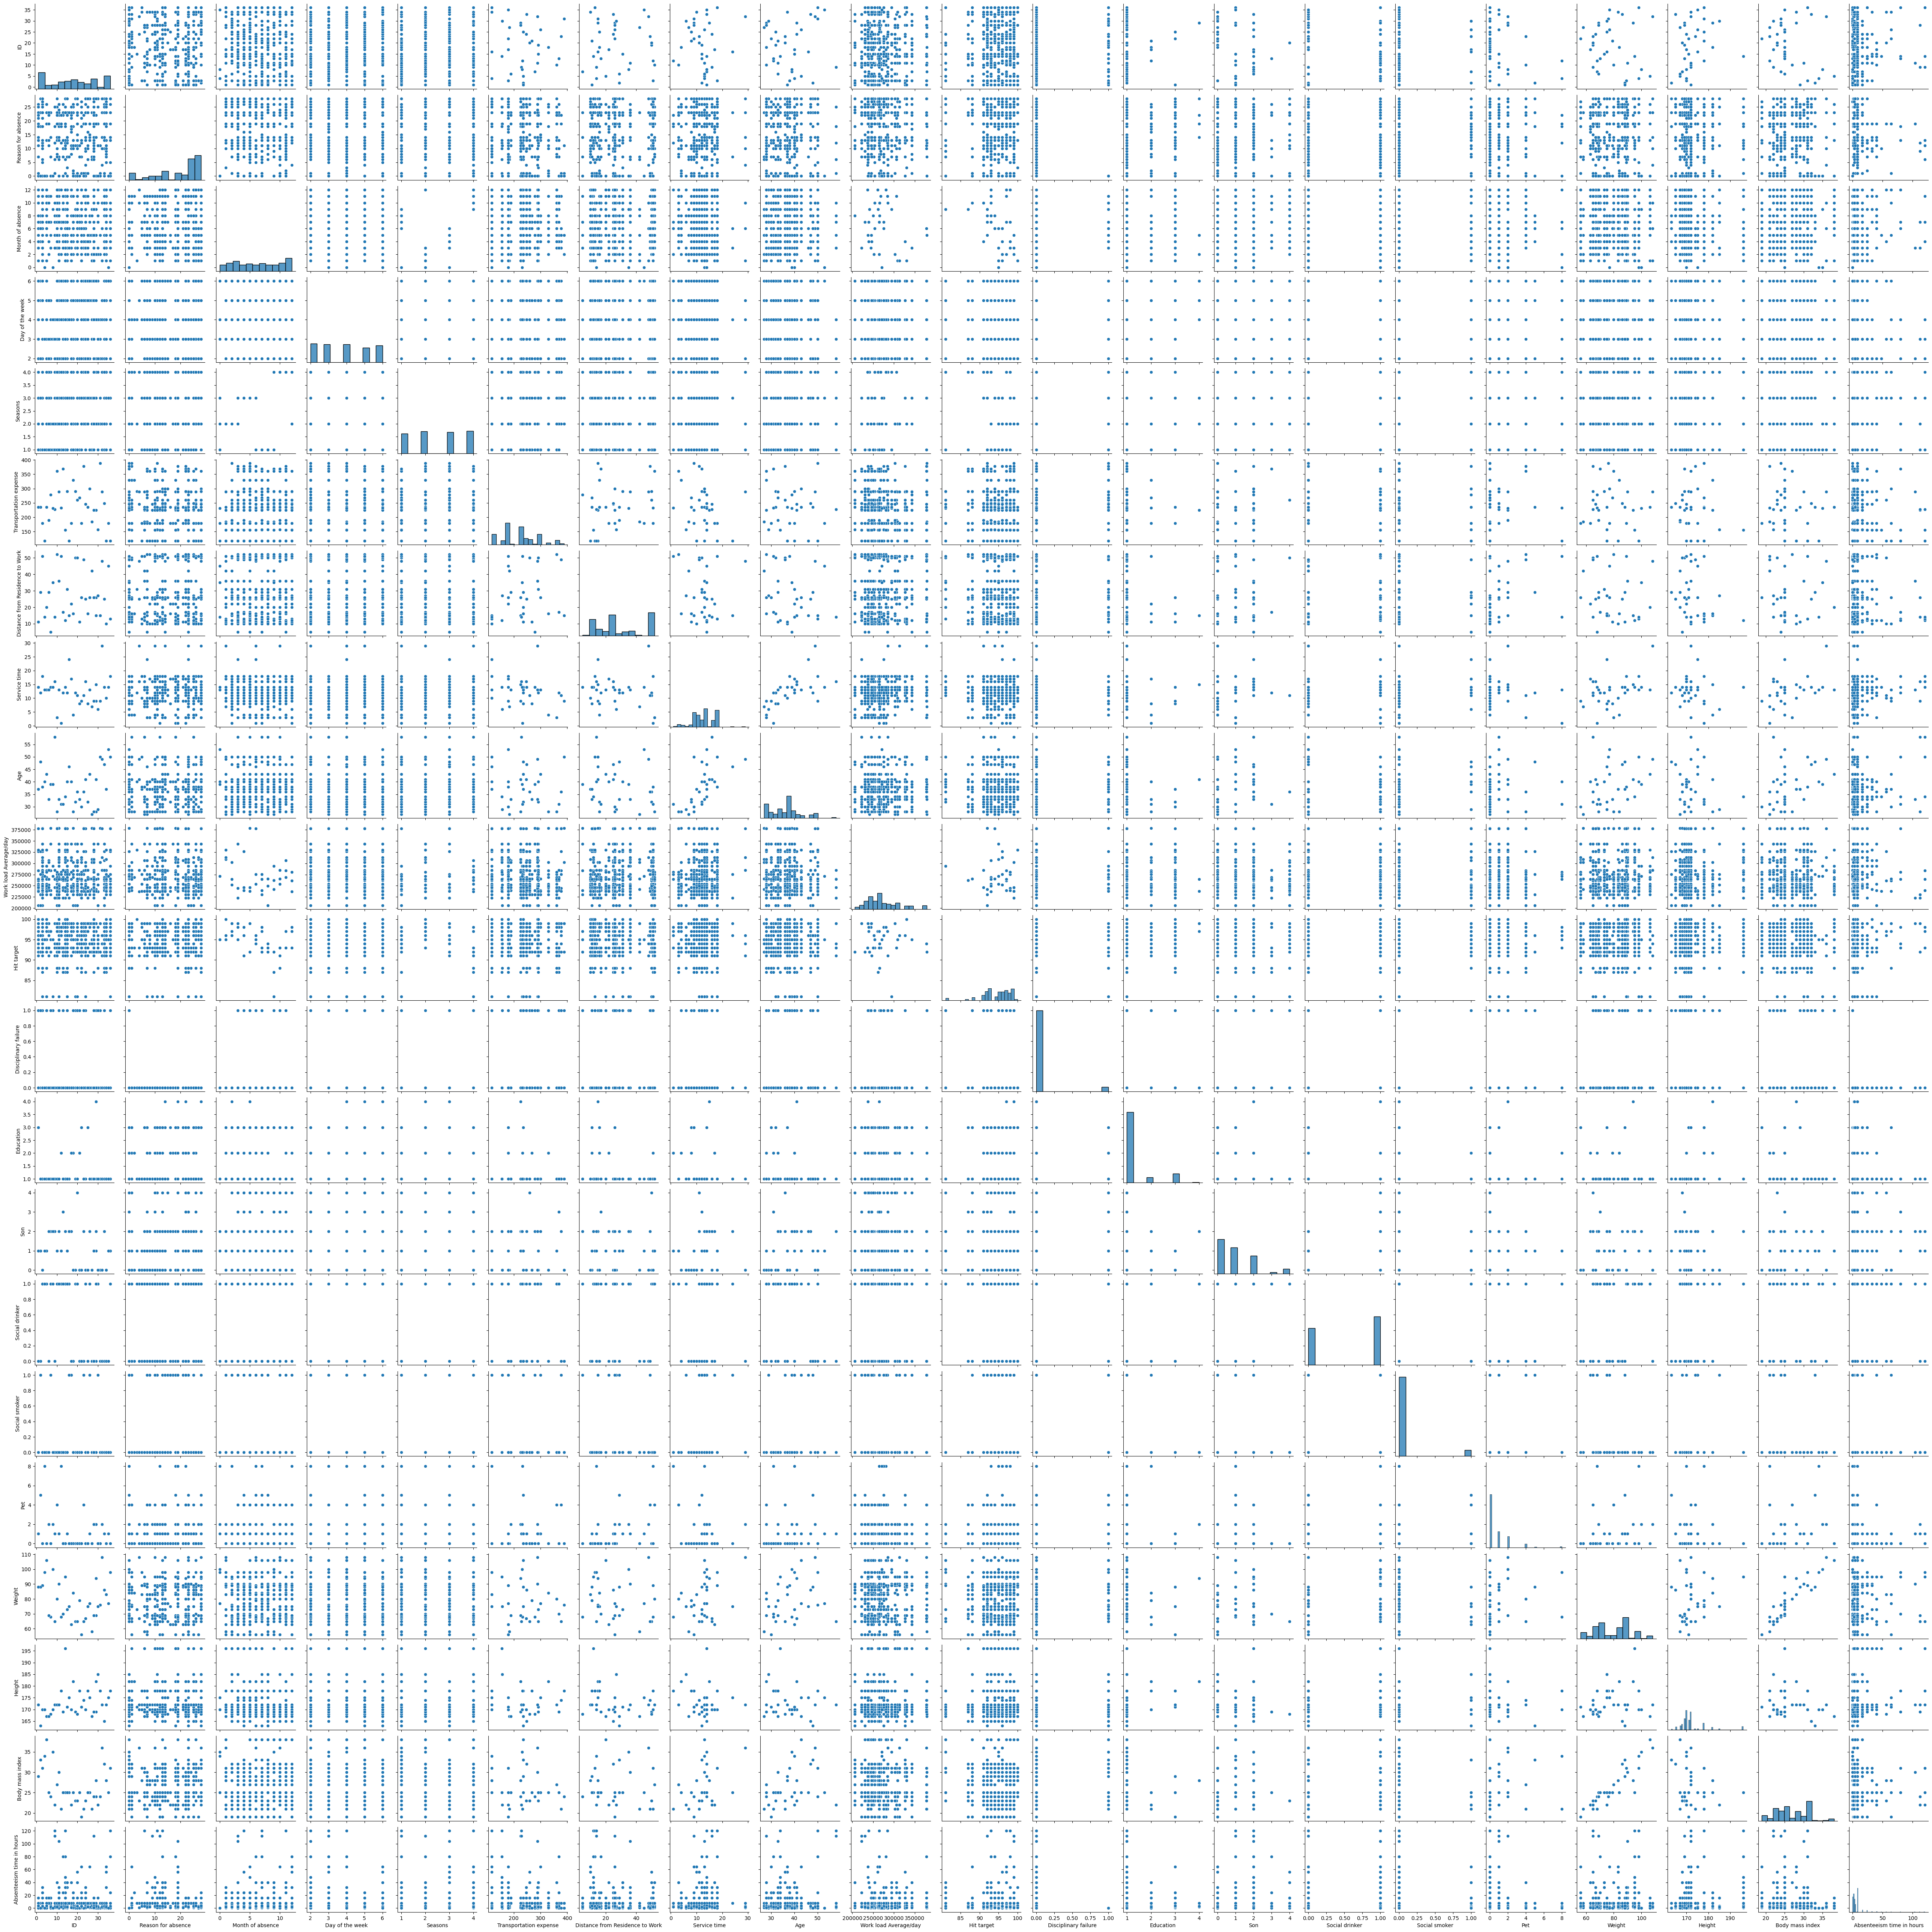

In [39]:
sns.pairplot(data = df)
plt.show()

In [40]:
df.corr()

ID  Reason for absence  \
ID                               1.000000           -0.064245   
Reason for absence              -0.064245            1.000000   
Month of absence                -0.000043           -0.083858   
Day of the week                  0.034468            0.116319   
Seasons                          0.098495           -0.117925   
Transportation expense          -0.224163           -0.119381   
Distance from Residence to Work -0.486160            0.161831   
Service time                    -0.272704            0.048425   
Age                              0.040899           -0.078608   
Work load Average/day            0.092457           -0.123473   
Hit target                       0.018789            0.088943   
Disciplinary failure             0.004502           -0.545054   
Education                       -0.036254           -0.047357   
Son                              0.002767           -0.055364   
Social drinker                  -0.451338            0.065441   
Social smoker                   -0.010826           -0.115702   
Pet                             -0.041418           -0.055911   
Weight                          -0.254222           -0.000269   
Height                           0.076363           -0.079267   
Body mass index                 -0.306924            0.037205   
Absenteeism time in hours       -0.017997           -0.173116   

                                 Month of absence  Day of the week   Seasons  \
ID                                      -0.000043         0.034468  0.098495   
Reason for absence                      -0.083858         0.116319 -0.117925   
Month of absence                         1.000000        -0.006528  0.407770   
Day of the week                         -0.006528         1.000000  0.046493   
Seasons                                  0.407770         0.046493  1.000000   
Transportation expense                   0.137525         0.033988  0.036995   
Distance from Residence to Work         -0.003887         0.118026 -0.063108   
Service time                            -0.062862         0.021252 -0.010904   
Age                                     -0.001520         0.004459 -0.012089   
Work load Average/day                   -0.169991         0.015646  0.150439   
Hit target                              -0.460453         0.030986 -0.061154   
Disciplinary failure                     0.107946        -0.015120  0.151766   
Education                               -0.066128         0.058516 -0.002951   
Son                                      0.079031         0.098079  0.046950   
Social drinker                           0.056226         0.041772 -0.045982   
Social smoker                           -0.038603         0.013156 -0.048671   
Pet                                      0.047787        -0.028885  0.012356   
Weight                                   0.023278        -0.128980 -0.026278   
Height                                  -0.068942        -0.082133 -0.033737   
Body mass index                          0.051046        -0.103578 -0.011031   
Absenteeism time in hours                0.024345        -0.124361 -0.005615   

                                 Transportation expense  \
ID                                            -0.224163   
Reason for absence                            -0.119381   
Month of absence                               0.137525   
Day of the week                                0.033988   
Seasons                                        0.036995   
Transportation expense                         1.000000   
Distance from Residence to Work                0.262183   
Service time                                  -0.349887   
Age                                           -0.227542   
Work load Average/day                          0.005438   
Hit target                                    -0.080193   
Disciplinary failure                           0.109222   
Education                                     -0.055065   
Son                  

ValueError: num must be an integer with 1 <= num <= 9, not 10

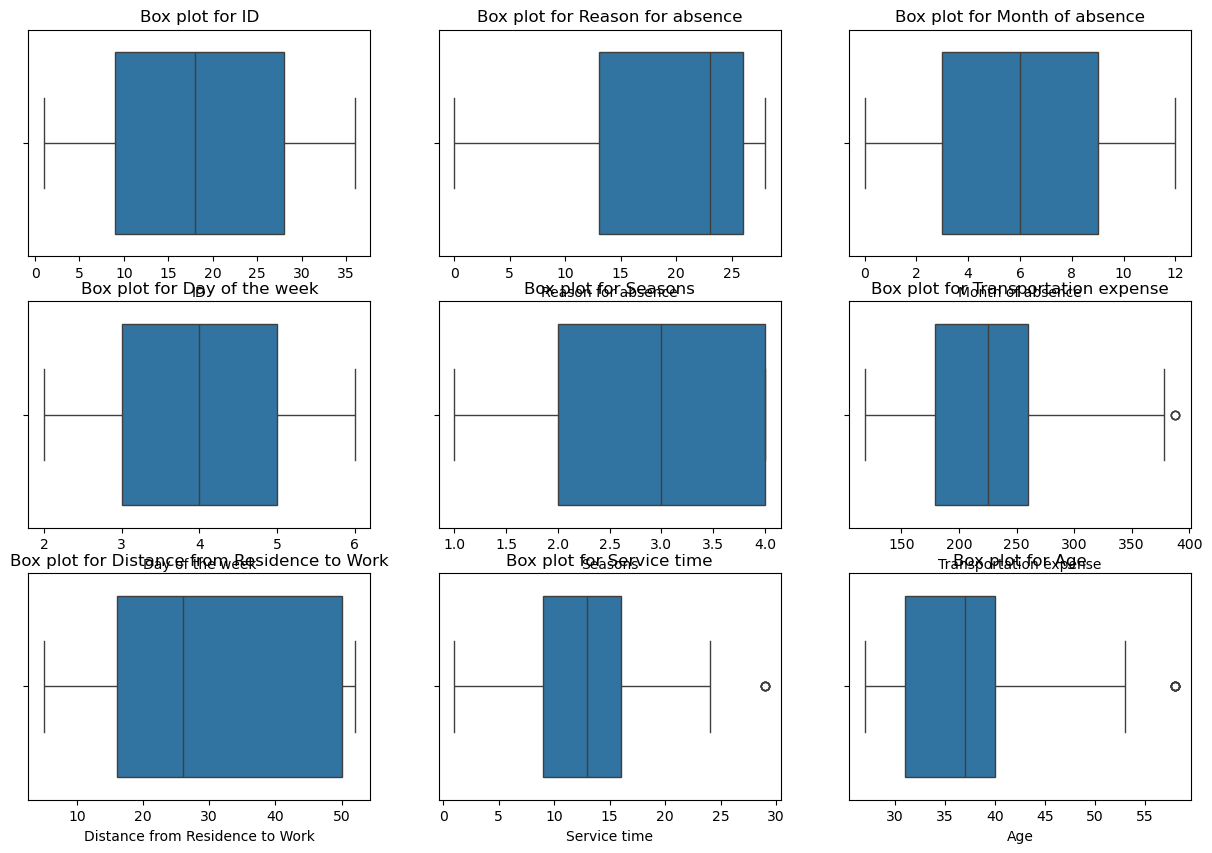

In [41]:
data = df

def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(data)

# Visualize outliers with box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for {column}')
plt.tight_layout()
plt.show()

# Print outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f'Outliers in {feature}:')
    print(outliers)

#### Hyperparameter tuning on Complete dataset

In [91]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=4)

r2_scorer = make_scorer(r2_score, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
    'vote': VotingRegressor(estimators=[
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('mlp', MLPRegressor()),
    ('bagging', BaggingRegressor()),
    ('adaboost', AdaBoostRegressor()),
    ('svr', SVR())
])
}
from sklearn.model_selection import cross_val_score

def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores_r2 = cross_val_score(model, X_train, Y_train, cv=5, scoring=r2_scorer)
    scores_mse = cross_val_score(model, X_train, Y_train, cv=5, scoring=mse_scorer)
    print(f"Cross-validation R2 scores for {model_name}: {scores_r2}")
    print(f"Cross-validation MSE scores for {model_name}: {scores_mse}")
    print(f"Average cross-validation R2 score for {model_name}: {scores_r2.mean()}")
    print(f"Average cross-validation MSE score for {model_name}: {scores_mse.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation R2 scores for ridge: [-0.05248497  0.17837938  0.13140101  0.17001978 -0.55987411]
Cross-validation MSE scores for ridge: [-103.67404291 -234.2693879  -216.7445794  -155.52562071  -57.21928322]
Average cross-validation R2 score for ridge: -0.02651178096116753
Average cross-validation MSE score for ridge: -153.48658282783182
Running cross-validation for decision_tree...
Cross-validation R2 scores for decision_tree: [-1.97677871 -0.2734861  -0.40098219 -0.48316541 -3.89427618]
Cross-validation MSE scores for decision_tree: [-226.60294118 -504.01680672 -164.47975518 -172.07721281 -181.35381356]
Average cross-validation R2 score for decision_tree: -1.4057377164317573
Average cross-validation MSE score for decision_tree: -249.7061058886831
Running cross-validation for random_forest...
Cross-validation R2 scores for random_forest: [-0.37501767  0.13623679  0.26213241  0.33395489 -0.72481259]
Cross-validation MSE scores for random_forest:

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation R2 scores for mlp: [-1.42115267 -0.09610895 -1.32786872 -0.39900127 -2.29587831]
Cross-validation MSE scores for mlp: [-1088.11392829  -602.47603999  -299.75657462  -922.3461835
  -241.83051684]
Average cross-validation R2 score for mlp: -1.1080019856033227
Average cross-validation MSE score for mlp: -630.9046486489187
Running cross-validation for bagging...
Cross-validation R2 scores for bagging: [-0.46018795 -0.0905882   0.14243879  0.28009653 -0.95709397]
Cross-validation MSE scores for bagging: [-151.42780759 -261.2902038  -186.60891276 -124.64963503  -78.22004419]
Average cross-validation R2 score for bagging: -0.2170669584185158
Average cross-validation MSE score for bagging: -160.43932067440295
Running cross-validation for adaboost...
Cross-validation R2 scores for adaboost: [-0.57190183 -0.22940454  0.06087974 -0.12351798 -1.64963586]
Cross-validation MSE scores for adaboost: [-126.47394552 -346.06776281 -237.78540466 -208.6575608  -116.36687408]
Average cross-

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation R2 scores for vote: [-0.04968827  0.10223717  0.29315539  0.22072121 -0.1662086 ]
Cross-validation MSE scores for vote: [ -97.34261329 -235.568689   -197.47330803 -147.25103528  -49.11990973]
Average cross-validation R2 score for vote: 0.08004337916005447
Average cross-validation MSE score for vote: -145.35111106973415


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=4)


r2_scorer = make_scorer(r2_score, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


param_grid = {
    'ridge': {
        'alpha': [0.05, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
        'max_iter': [500,1000,2000]
    },
    'decision_tree': {
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'random_forest': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'extra_trees': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'gradient_boosting': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'min_samples_leaf': [1, 2, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    },
    'svr': {
        'kernel': ['poly', 'sigmoid', 'rbf', 'linear'],
        'C': [1e0, 1e2, 1e4, 1e6, 1e8, 1e10],
        'epsilon': [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (200, 200), (500, 500), (1000, 1000)],
        'activation': ['relu', 'tanh', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
        'max_iter': [500, 1000,2000]
    },
    'bagging': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_samples': [0.2, 0.5, 0.8, 1.0],
        'max_features': [0.2, 0.5, 0.8, 1.0]
    },
    'adaboost': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.01, 0.05, 0.1]
    },
    'vote':{
        'estimators': [100, 250, 500, 1000, 2000, 5000, 10000]
    }
}

models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
    'vote': VotingRegressor(estimators=[
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('mlp', MLPRegressor()),
    ('bagging', BaggingRegressor()),
    ('adaboost', AdaBoostRegressor()),
    ('svr', SVR())
])
}

def grid_search_model(model_name, model, param_grid):
    print(f"Running GridSearchCV for {model_name}...")
    scoring = {'r2': r2_scorer, 'mse': mse_scorer}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R2 Score for {model_name}: {grid_search.best_score_}")
    print(f"Best MSE for {model_name}: {grid_search.cv_results_['mean_test_mse'][grid_search.best_index_]}")
    return grid_search.best_estimator_
    
best_models = {}
for model_name in models:
    best_models[model_name] = grid_search_model(model_name, models[model_name], param_grid[model_name])


for model_name, model in best_models.items():
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    mse_val = mse(Y_test, Y_pred)
    print(f"R2 Score for {model_name} on test set: {r2}")
    print(f"MSE for {model_name} on test set: {mse_val}")

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

# Assuming X and Y are your feature and target variables
X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=4)

# Define R2 scorer for RandomizedSearchCV
scorer = make_scorer(r2_score)

# Define hyperparameter distributions for each model
param_distributions = {
    'ridge': {
        'alpha': [0.05, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
        'solver': ['svd', 'cholesky']
    },
    'decision_tree': {
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'random_forest': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'extra_trees': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'gradient_boosting': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'subsample': [0.8, 0.9, 1.0]
    },
    'svr': {
        'kernel': ['poly', 'sigmoid', 'rbf', 'linear'],
        'C': [1e0, 1e2, 1e4, 1e6, 1e8, 1e10],
        'epsilon': [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (200, 200), (500, 500), (1000, 1000)],
        'activation': ['relu', 'tanh', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
    },
    'bagging': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_samples': [0.2, 0.5, 0.8, 1.0],
        'max_features': [0.2, 0.5, 0.8, 1.0]
    },
    'adaboost': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.01, 0.05, 0.1]
    }
}

# Define models with their parameter distributions
models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
}

# Function to perform random search and get the best model for each regression
def random_search_model(model_name, model, param_distribution):
    print(f"Running RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distribution, cv=5, n_iter=10, random_state=42, scoring=scorer)
    random_search.fit(X_train, Y_train)
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best R2 Score for {model_name}: {random_search.best_score_}")
    return random_search.best_estimator_

# Running RandomizedSearchCV for each model
best_models = {}
for model_name in models:
    best_models[model_name] = random_search_model(model_name, models[model_name], param_distributions[model_name])

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    print(f"R2 Score for {model_name} on test set: {r2}")

# Compare the performance of the best models
best_model_name = max(best_models, key=lambda x: r2_score(Y_test, best_models[x].predict(X_test)))
print(f"Best model: {best_model_name}")

# Use the best model to make predictions on the test set
Y_pred = best_models[best_model_name].predict(X_test)

# Evaluate the performance of the best model
r2 = r2_score(Y_test, Y_pred)
print(f"R2 Score for best model on test set: {r2}")

# Plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

#### PCA Analysis on Dataset

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

# Fit the PCA object to your data and transform it
pca_df = pca.fit_transform(df.drop(columns = 'Absenteeism time in hours'))

# Convert the transformed data back into a pandas DataFrame
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2','PC3','PC4','PC5'])

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

[9.99996588e-01 2.96315728e-06 1.68350374e-07 1.26753904e-07
 4.40161799e-08]


In [95]:
print(pca.components_)

[[ 2.60889666e-05 -2.66601742e-05 -1.49555692e-05  5.69498361e-07
   4.28239226e-06  9.32163661e-06 -2.60878690e-05 -7.50134116e-08
  -6.53962689e-06  9.99999998e-01 -8.65475528e-06  1.68157530e-07
  -1.29206408e-06  7.82428911e-07 -4.27898291e-07  2.06362497e-07
   2.40107556e-07 -1.27061503e-05  1.59635143e-05 -9.95258726e-06]
 [-3.81939492e-02 -1.46669887e-02  7.03685153e-03  7.60739472e-04
   5.83103358e-04  9.95621372e-01  6.12495463e-02 -2.28479010e-02
  -2.25652356e-02 -7.49354265e-06 -4.47750245e-03  3.62251237e-04
  -5.44007601e-04  6.23683481e-03  1.09464334e-03  1.71916318e-04
   7.88482221e-03 -4.12091355e-02 -1.81518000e-02 -8.97630011e-03]
 [-4.98505829e-01  1.12287713e-01 -1.03623747e-02  3.75798201e-03
  -5.94278286e-03 -4.92343111e-02  7.77037254e-01  1.19251827e-01
   3.03419466e-02  4.31256331e-05 -5.14710479e-03 -1.01321583e-03
  -1.15031984e-02 -5.57553890e-03  1.74952905e-02 -1.87487308e-03
   2.86583563e-03  3.07093419e-01 -7.24836057e-02  1.31548700e-01]
 [-1.21

In [97]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df[['PC1', 'PC2', 'PC3']], df['Absenteeism time in hours'], test_size=0.2, random_state=42)

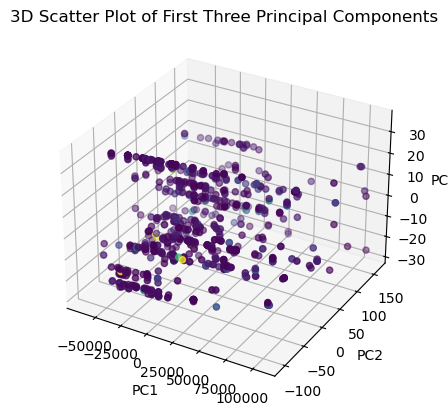

In [99]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c = df['Absenteeism time in hours'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of First Three Principal Components')
plt.show()

#### Hyperparameter tuning on PCA Dataset

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns = 'Absenteeism time in hours'), df['Absenteeism time in hours'], test_size=0.2, random_state=4)

models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
    'vote': VotingRegressor(estimators=[
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('mlp', MLPRegressor()),
    ('bagging', BaggingRegressor()),
    ('adaboost', AdaBoostRegressor()),
    ('svr', SVR())
])
}
r2_scorer = make_scorer(r2_score, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
from sklearn.model_selection import cross_val_score

def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores_r2 = cross_val_score(model, X_train, Y_train, cv=5, scoring=r2_scorer)
    scores_mse = cross_val_score(model, X_train, Y_train, cv=5, scoring=mse_scorer)
    print(f"Cross-validation R2 scores for {model_name}: {scores_r2}")
    print(f"Cross-validation MSE scores for {model_name}: {scores_mse}")
    print(f"Average cross-validation R2 score for {model_name}: {scores_r2.mean()}")
    print(f"Average cross-validation MSE score for {model_name}: {scores_mse.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation R2 scores for ridge: [-0.05248497  0.17837938  0.13140101  0.17001978 -0.55987411]
Cross-validation MSE scores for ridge: [-103.67404291 -234.2693879  -216.7445794  -155.52562071  -57.21928322]
Average cross-validation R2 score for ridge: -0.02651178096116753
Average cross-validation MSE score for ridge: -153.48658282783182
Running cross-validation for decision_tree...
Cross-validation R2 scores for decision_tree: [-0.47270302 -0.62986088 -0.02151993 -0.44907666 -1.20649326]
Cross-validation MSE scores for decision_tree: [-231.09243697 -480.27917834 -245.40136535 -276.07509416  -73.15042373]
Average cross-validation R2 score for decision_tree: -0.5559307503085966
Average cross-validation MSE score for decision_tree: -261.1996997103926
Running cross-validation for random_forest...
Cross-validation R2 scores for random_forest: [-0.25772676  0.16778638  0.27716833  0.30056641 -0.78690281]
Cross-validation MSE scores for random_forest:

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation R2 scores for mlp: [-1.40918533 -0.33123288 -0.19851578 -0.2382533  -5.03605854]
Cross-validation MSE scores for mlp: [-544.42792241 -803.75430419 -282.50259949 -381.55820028 -133.83600532]
Average cross-validation R2 score for mlp: -1.442649166295962
Average cross-validation MSE score for mlp: -429.2158063385129
Running cross-validation for bagging...
Cross-validation R2 scores for bagging: [-0.59808373  0.08826424  0.1982171   0.01409245 -1.18570977]
Cross-validation MSE scores for bagging: [-162.31025149 -332.55597201 -205.37363755 -136.18290982  -56.61727745]
Average cross-validation R2 score for bagging: -0.29664394292838153
Average cross-validation MSE score for bagging: -178.60800966364513
Running cross-validation for adaboost...
Cross-validation R2 scores for adaboost: [-0.33487432 -0.22353064  0.00590611  0.05378532 -0.81067213]
Cross-validation MSE scores for adaboost: [-157.97135549 -345.99105439 -201.16922794 -184.52012229  -78.25950391]
Average cross-valid

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()

param_grid = {
    'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=pca, param_grid=param_grid, cv=5)
grid_search.fit(df.drop(columns = 'Absenteeism time in hours'))

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_pca = grid_search.best_estimator_
best_pca_df = best_pca.fit_transform(df.drop(columns = 'Absenteeism time in hours'))

# Use the n_components attribute to determine the number of columns
n_components = best_pca.n_components_
columns = [f'PC{i+1}' for i in range(n_components)]

best_pca_df = pd.DataFrame(best_pca_df, columns=columns)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
pca = PCA()

param_distribution = {
    'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
random_search = RandomizedSearchCV(estimator=pca, param_distributions=param_distribution, cv=5, n_iter=10, random_state=42)
random_search.fit(df.drop(columns = 'Absenteeism time in hours'))

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_pca = random_search.best_estimator_

best_pca_df = pd.DataFrame(best_pca.fit_transform(df.drop(columns = 'Absenteeism time in hours')), 
                           columns=[f'PC{i+1}' for i in range(best_pca.n_components_)])

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

X = df.drop(columns='Absenteeism time in hours')
Y = df['Absenteeism time in hours']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define R2 scorer for RandomizedSearchCV
scorer = make_scorer(r2_score)
# Define hyperparameter distributions for each model
param_distributions = {
    'ridge': {
        'alpha': [0.05, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
        'solver': ['svd', 'cholesky']
    },
    'decision_tree': {
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'random_forest': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'extra_trees': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_depth': [5, 7, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
    },
    'gradient_boosting': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10, 15, 20, 25],
        'subsample': [0.8, 0.9, 1.0]
    },
    'svr': {
        'kernel': ['poly', 'sigmoid', 'rbf', 'linear'],
        'C': [1e0, 1e2, 1e4, 1e6, 1e8, 1e10],
        'epsilon': [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (200, 200), (500, 500), (1000, 1000)],
        'activation': ['relu', 'tanh', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
    },
    'bagging': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'max_samples': [0.2, 0.5, 0.8, 1.0],
        'max_features': [0.2, 0.5, 0.8, 1.0]
    },
    'adaboost': {
        'n_estimators': [100, 250, 500, 1000, 2000, 5000, 10000],
        'learning_rate': [0.001, 0.01, 0.05, 0.1]
    }
}
# Define models with their parameter distributions
models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
}

# Function to perform random search and get the best model for each regression
def random_search_model(model_name, model, param_distribution):
    print(f"Running RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distribution, cv=5, n_iter=10, random_state=42, scoring=scorer)
    random_search.fit(X_train, Y_train)
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best R2 Score for {model_name}: {random_search.best_score_}")
    return random_search.best_estimator_

# Running RandomizedSearchCV for each model
best_models = {}
for model_name in models:
    best_models[model_name] = random_search_model(model_name, models[model_name], param_distributions[model_name])

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    print(f"R2 Score for {model_name} on test set: {r2}")

# Compare the performance of the best models
best_model_name = max(best_models, key=lambda x: r2_score(Y_test, best_models[x].predict(X_test)))
print(f"Best model: {best_model_name}")

# Use the best model to make predictions on the test set
Y_pred = best_models[best_model_name].predict(X_test)

# Evaluate the performance of the best model
r2 = r2_score(Y_test, Y_pred)
print(f"R2 Score for best model on test set: {r2}")

# Plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

#### Normalization on Dataset

In [103]:
from sklearn.preprocessing import MinMaxScaler
df_1 = df.copy()
df_1p = df_1.drop(columns = 'Absenteeism time in hours')
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(df_1p)


normalized_df = pd.DataFrame(normalized_data, columns=df_1p.columns)
print("Standardized Data:")
normalized_df.head()

Standardized Data:


ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  0.285714            0.928571          0.583333             0.25      0.0   
1  1.000000            0.000000          0.583333             0.25      0.0   
2  0.057143            0.821429          0.583333             0.50      0.0   
3  0.171429            0.250000          0.583333             0.75      0.0   
4  0.285714            0.821429          0.583333             0.75      0.0   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.633333                         0.659574      0.428571   
1                0.000000                         0.170213      0.607143   
2                0.225926                         0.978723      0.607143   
3                0.596296                         0.000000      0.464286   
4                0.633333                         0.659574      0.428571   

        Age  Work load Average/day  Hit target  Disciplinary failure  \
0  0.193548               0.194471    0.842105                   0.0   
1  0.741935               0.194471    0.842105                   1.0   
2  0.354839               0.194471    0.842105                   0.0   
3  0.387097               0.194471    0.842105                   0.0   
4  0.193548               0.194471    0.842105                   0.0   

   Education   Son  Social drinker  Social smoker    Pet    Weight    Height  \
0        0.0  0.50             1.0            0.0  0.125  0.653846  0.272727   
1        0.0  0.25             1.0            0.0  0.000  0.807692  0.454545   
2        0.0  0.00             1.0            0.0  0.000  0.634615  0.212121   
3        0.0  0.50             1.0            1.0  0.000  0.230769  0.151515   
4        0.0  0.50             1.0            0.0  0.125  0.653846  0.272727   

   Body mass index  
0         0.578947  
1         0.631579  
2         0.631579  
3         0.263158  
4         0.578947

In [105]:
normalized_df['Absenteeism time in hours'] = df['Absenteeism time in hours']

In [107]:
normalized_df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  0.285714            0.928571          0.583333             0.25      0.0   
1  1.000000            0.000000          0.583333             0.25      0.0   
2  0.057143            0.821429          0.583333             0.50      0.0   
3  0.171429            0.250000          0.583333             0.75      0.0   
4  0.285714            0.821429          0.583333             0.75      0.0   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.633333                         0.659574      0.428571   
1                0.000000                         0.170213      0.607143   
2                0.225926                         0.978723      0.607143   
3                0.596296                         0.000000      0.464286   
4                0.633333                         0.659574      0.428571   

        Age  Work load Average/day  ...  Disciplinary failure  Education  \
0  0.193548               0.194471  ...                   0.0        0.0   
1  0.741935               0.194471  ...                   1.0        0.0   
2  0.354839               0.194471  ...                   0.0        0.0   
3  0.387097               0.194471  ...                   0.0        0.0   
4  0.193548               0.194471  ...                   0.0        0.0   

    Son  Social drinker  Social smoker    Pet    Weight    Height  \
0  0.50             1.0            0.0  0.125  0.653846  0.272727   
1  0.25             1.0            0.0  0.000  0.807692  0.454545   
2  0.00             1.0            0.0  0.000  0.634615  0.212121   
3  0.50             1.0            1.0  0.000  0.230769  0.151515   
4  0.50             1.0            0.0  0.125  0.653846  0.272727   

   Body mass index  Absenteeism time in hours  
0         0.578947                        4.0  
1         0.631579                        0.0  
2         0.631579                        2.0  
3         0.263158                        4.0  
4         0.578947                        2.0  

[5 rows x 21 columns]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(normalized_df.drop(columns = 'Absenteeism time in hours'), normalized_df['Absenteeism time in hours'], test_size=0.2, random_state=4)


from sklearn.model_selection import cross_val_score

def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores_r2 = cross_val_score(model, X_train, Y_train, cv=5, scoring=r2_scorer)
    scores_mse = cross_val_score(model, X_train, Y_train, cv=5, scoring=mse_scorer)
    print(f"Cross-validation R2 scores for {model_name}: {scores_r2}")
    print(f"Cross-validation MSE scores for {model_name}: {scores_mse}")
    print(f"Average cross-validation R2 score for {model_name}: {scores_r2.mean()}")
    print(f"Average cross-validation MSE score for {model_name}: {scores_mse.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation R2 scores for ridge: [-0.03604913  0.16888447  0.11950543  0.17695689 -0.47601986]
Cross-validation MSE scores for ridge: [-102.05504651 -236.97667839 -219.71292511 -154.22571282  -54.14334274]
Average cross-validation R2 score for ridge: -0.009344440089381022
Average cross-validation MSE score for ridge: -153.42274111515295
Running cross-validation for decision_tree...
Cross-validation R2 scores for decision_tree: [-0.5337635  -0.57345158 -0.32133357 -0.1867572  -4.09321719]
Cross-validation MSE scores for decision_tree: [-221.57563025 -445.94211018 -243.80602637 -251.1873823   -68.84533898]
Average cross-validation R2 score for decision_tree: -1.1417046081420157
Average cross-validation MSE score for decision_tree: -246.2712976150912
Running cross-validation for random_forest...
Cross-validation R2 scores for random_forest: [-0.29443761  0.21098275  0.1694971   0.32314644 -1.16785427]
Cross-validation MSE scores for random_forest

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Cross-validation R2 scores for mlp: [ 0.06399328  0.12244455  0.03855936  0.16707207 -0.08543599]
Cross-validation MSE scores for mlp: [ -92.21594562 -251.84636509 -239.88960527 -155.0822022   -42.66969942]
Average cross-validation R2 score for mlp: 0.06132665217148936
Average cross-validation MSE score for mlp: -156.34076352218344
Running cross-validation for bagging...
Cross-validation R2 scores for bagging: [-0.32316244 -0.011289   -0.0055886   0.26198439 -0.92814608]
Cross-validation MSE scores for bagging: [-189.94788858 -245.35451944 -222.67533211 -130.99081283  -95.10917474]
Average cross-validation R2 score for bagging: -0.20124034838283905
Average cross-validation MSE score for bagging: -176.81554554271668
Running cross-validation for adaboost...
Cross-validation R2 scores for adaboost: [-0.42735773 -0.28695446 -0.07668781  0.05007744 -1.40084841]
Cross-validation MSE scores for adaboost: [-152.62423901 -328.18351883 -244.7641152  -212.36041294  -96.79061372]
Average cross-val

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Cross-validation R2 scores for vote: [ 0.00437626  0.24918723  0.15885039  0.23745242 -0.36148938]
Cross-validation MSE scores for vote: [ -96.75969635 -232.33564855 -209.74493397 -132.27007051  -53.8783227 ]
Average cross-validation R2 score for vote: 0.057675381947685886
Average cross-validation MSE score for vote: -144.99773441663473


In [111]:
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)
lasso.fit(X = df.drop(columns = 'Absenteeism time in hours'), y = df['Absenteeism time in hours'])
coefficients = lasso.coef_

selection = SelectFromModel(lasso, prefit=True)
X_selected = selection.transform(df.drop(columns='Absenteeism time in hours'))

feature_names = df.drop(columns='Absenteeism time in hours').columns

print("Selected features:", feature_names[selection.get_support()])
print("Coefficients:", coefficients[selection.get_support()])


Selected features: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index'],
      dtype='object')
Coefficients: [-1.70282047e-01 -4.90579193e-01  1.18924284e-01 -8.48335442e-01
  7.92547759e-02 -7.11422719e-05 -6.32534314e-02 -1.62077037e-01
  2.85053255e-01  9.84008600e-02 -1.79790664e+01 -2.38738568e+00
  1.03737782e+00  3.29410183e-01 -2.46940935e+00 -4.28249959e-01
  5.26416977e-01 -2.68794536e-01 -1.93076058e+00]


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.263e+04, tolerance: 1.313e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [113]:
from sklearn.inspection import permutation_importance

# Create a Lasso regression model with a regularization parameter of 0.01
lasso = Lasso(alpha=0.01)

# Fit the Lasso model to the data
lasso.fit(X=df.drop(columns='Absenteeism time in hours'), y=df['Absenteeism time in hours'])

# Get the permutation importance of the features
importances = permutation_importance(lasso, df.drop(columns='Absenteeism time in hours'), df['Absenteeism time in hours'], n_repeats=10, random_state=42)

# Print the feature importances
print("Feature importances:", importances.importances_mean)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.263e+04, tolerance: 1.313e+01
  model = cd_fast.enet_coordinate_descent(


Feature importances: [3.75497963e-02 1.73112456e-01 1.36671275e-03 1.66290369e-02
 1.29345165e-04 1.16012899e-05 1.00619398e-02 4.85233661e-03
 4.41174172e-02 7.13485604e-04 2.35957537e-03 2.01621049e-01
 2.78709620e-02 1.46342462e-02 3.41688809e-04 4.27488364e-03
 2.45149751e-03 5.17777672e-01 3.00891096e-02 7.93238691e-01]


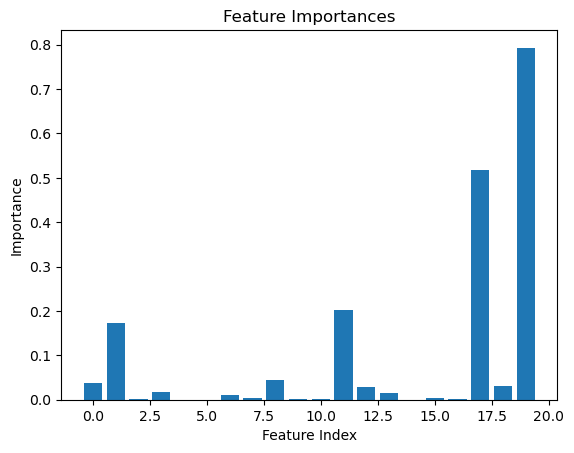

In [115]:
plt.bar(range(len(importances.importances_mean)), importances.importances_mean)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [117]:
feature_names = df.drop(columns='Absenteeism time in hours').columns

top_features_indices = np.argsort(importances.importances_mean)[::-1][:5]
top_features = feature_names[top_features_indices]
print("Top 5 most important features:", top_features)

Top 5 most important features: Index(['Body mass index', 'Weight', 'Disciplinary failure',
       'Reason for absence', 'Age'],
      dtype='object')


In [119]:
X_imp = df[top_features]

In [121]:
X_imp.head()

Body mass index  Weight  Disciplinary failure  Reason for absence  Age
0             30.0    90.0                   0.0                26.0   33
1             31.0    98.0                   1.0                 0.0   50
2             31.0    89.0                   0.0                23.0   38
3             24.0    68.0                   0.0                 7.0   39
4             30.0    90.0                   0.0                23.0   33

In [123]:
Y_imp = df['Absenteeism time in hours']
Y_imp.head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

#### CV score for top selected features





In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_imp,Y_imp, test_size=0.2, random_state=4)


from sklearn.model_selection import cross_val_score

def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores_r2 = cross_val_score(model, X_train, Y_train, cv=5, scoring=r2_scorer)
    scores_mse = cross_val_score(model, X_train, Y_train, cv=5, scoring=mse_scorer)
    print(f"Cross-validation R2 scores for {model_name}: {scores_r2}")
    print(f"Cross-validation MSE scores for {model_name}: {scores_mse}")
    print(f"Average cross-validation R2 score for {model_name}: {scores_r2.mean()}")
    print(f"Average cross-validation MSE score for {model_name}: {scores_mse.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation R2 scores for ridge: [ 0.01290212  0.1136148   0.06867979  0.10194394 -0.03504942]
Cross-validation MSE scores for ridge: [ -97.23314931 -252.73576771 -232.39562812 -168.28199408  -37.96767022]
Average cross-validation R2 score for ridge: 0.0524182458706592
Average cross-validation MSE score for ridge: -157.72284188769567
Running cross-validation for decision_tree...
Cross-validation R2 scores for decision_tree: [-0.09815019 -0.23526537  0.25431301  0.16861331 -1.74978531]
Cross-validation MSE scores for decision_tree: [-108.38344532 -440.69125829 -185.92507963 -182.13662983 -100.86759148]
Average cross-validation R2 score for decision_tree: -0.3320549095399913
Average cross-validation MSE score for decision_tree: -203.6008009097374
Running cross-validation for random_forest...
Cross-validation R2 scores for random_forest: [-0.16279364  0.19095942  0.35180047  0.21388954 -1.2557087 ]
Cross-validation MSE scores for random_forest: [

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Cross-validation R2 scores for mlp: [0.06422776 0.13095222 0.10789304 0.08254018 0.11145014]
Cross-validation MSE scores for mlp: [ -91.92426456 -254.70109129 -225.9409008  -172.71669344  -32.11752641]
Average cross-validation R2 score for mlp: 0.09941266792416725
Average cross-validation MSE score for mlp: -155.48009529821798
Running cross-validation for bagging...
Cross-validation R2 scores for bagging: [-0.33732198  0.30223415  0.24598729  0.25151005 -2.00534391]
Cross-validation MSE scores for bagging: [-126.55441544 -216.66865934 -159.99892101 -162.7325986   -83.89957775]
Average cross-validation R2 score for bagging: -0.3085868804231972
Average cross-validation MSE score for bagging: -149.9708344273156
Running cross-validation for adaboost...
Cross-validation R2 scores for adaboost: [-0.43582312 -0.01098505  0.13366601  0.17452158 -1.64806598]
Cross-validation MSE scores for adaboost: [-150.77150427 -335.42200174 -226.3150133  -149.25251556 -120.71628884]
Average cross-validation

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Cross-validation R2 scores for vote: [ 0.06185259  0.21552494  0.31786369  0.21036621 -0.30416149]
Cross-validation MSE scores for vote: [ -90.74566857 -214.91354728 -161.86435321 -150.80178489  -47.66125425]
Average cross-validation R2 score for vote: 0.10028918737451549
Average cross-validation MSE score for vote: -133.1973216386672


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Data Restructuring

In [126]:
allabsents=df[df['Absenteeism time in hours']!=0]
allabsents=allabsents.drop(['Disciplinary failure'],axis=1)
len(allabsents.ID.unique())

33

In [129]:
target=allabsents.groupby(['ID'])['Hit target'].mean()
work=allabsents.groupby(['ID'])['Work load Average/day'].mean()
age=allabsents.groupby(['ID'])['Age'].mean()
transport=allabsents.groupby(['ID'])['Transportation expense'].mean()
height=allabsents.groupby(['ID'])['Height'].mean()
service=allabsents.groupby(['ID'])['Service time'].mean()
weight=allabsents.groupby(['ID'])['Weight'].mean()
body=allabsents.groupby(['ID'])['Body mass index'].mean()
hours=allabsents.groupby(['ID'])['Absenteeism time in hours'].sum()
drink=allabsents.groupby(['ID'])['Social drinker'].mean()
smoker=allabsents.groupby(['ID'])['Social smoker'].mean()
education=allabsents.groupby(['ID'])['Education'].mean()
pet=allabsents.groupby(['ID'])['Pet'].mean()
smoker=allabsents.groupby(['ID'])['Social smoker'].mean()
distance=allabsents.groupby(['ID'])['Distance from Residence to Work'].mean()
df_optimised=pd.concat([target,work,age,transport,service,height,body,weight,drink,smoker,education,pet,distance,hours],axis=1)

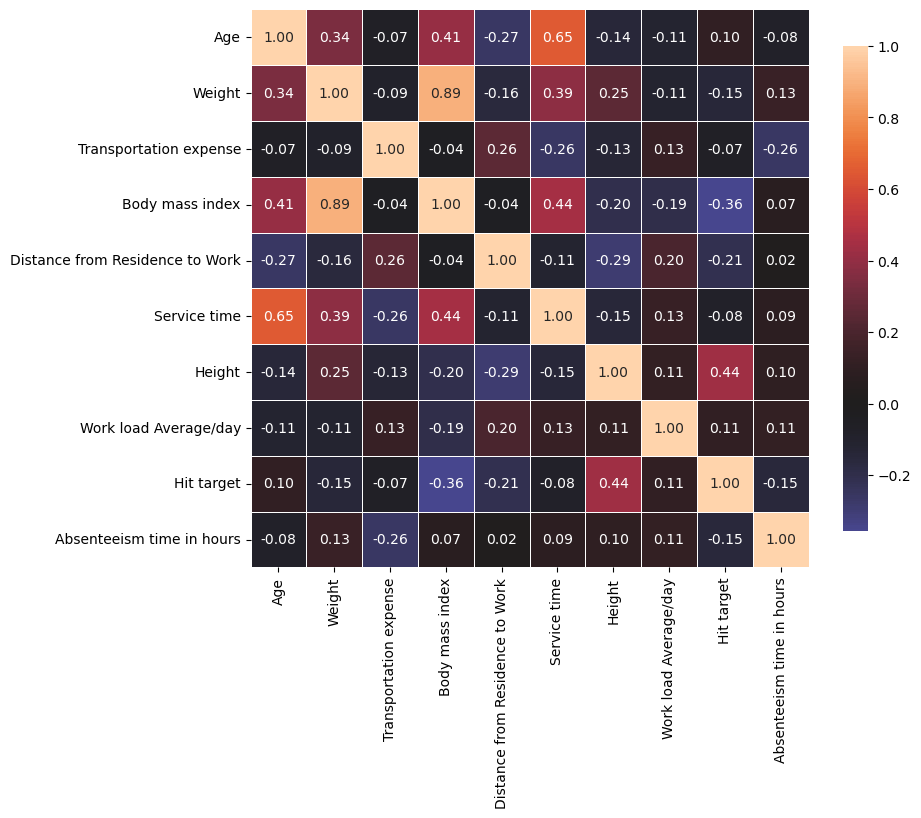

In [131]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_optimised[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day','Hit target','Absenteeism time in hours']])

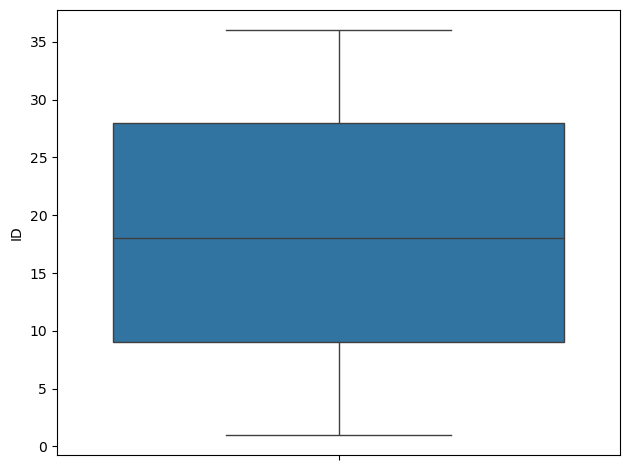

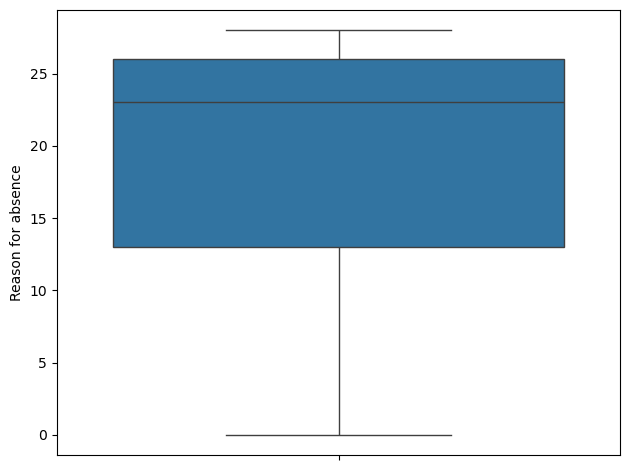

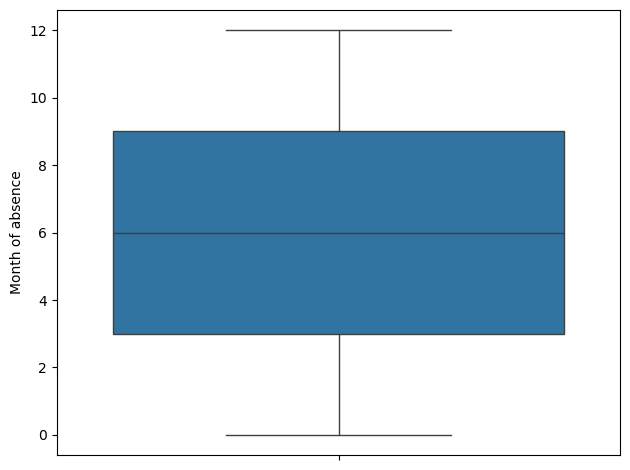

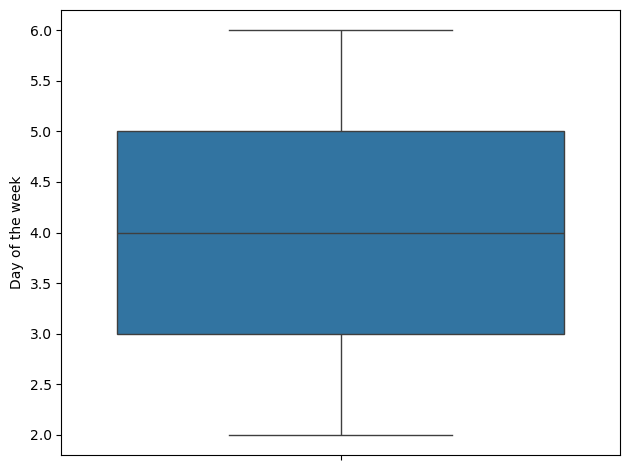

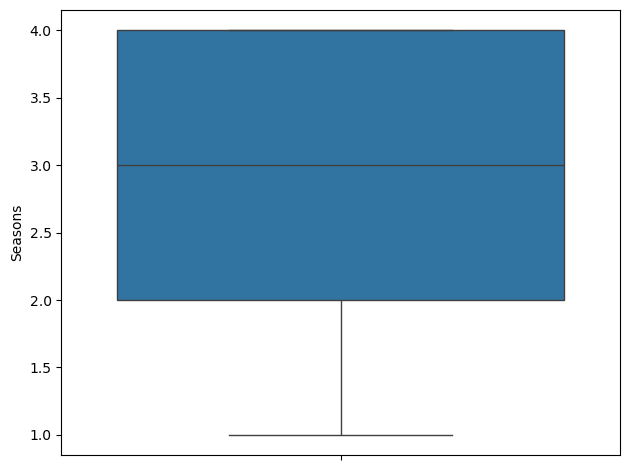

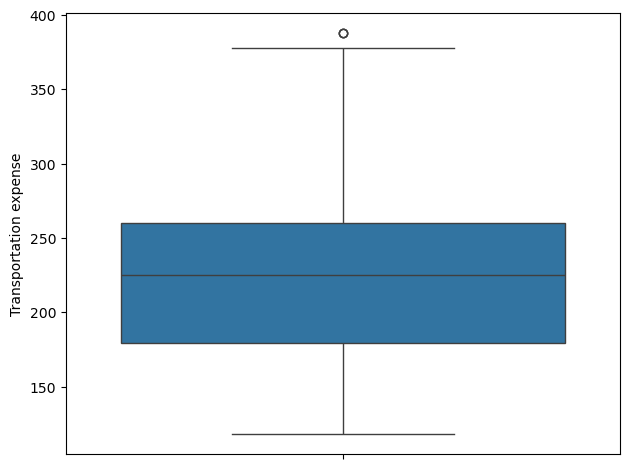

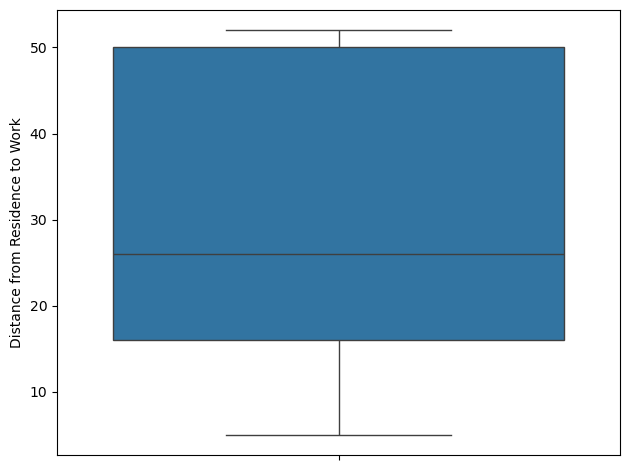

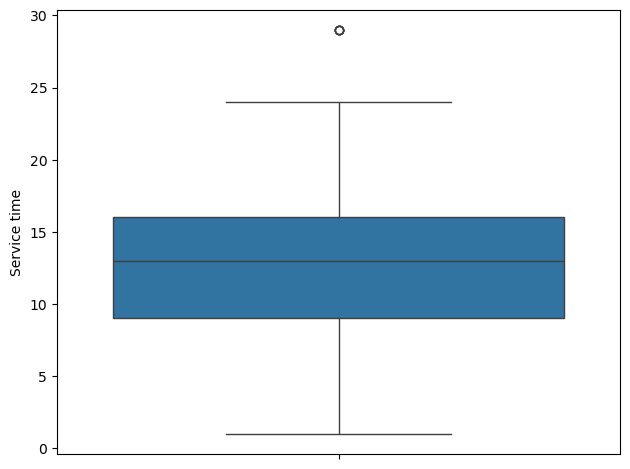

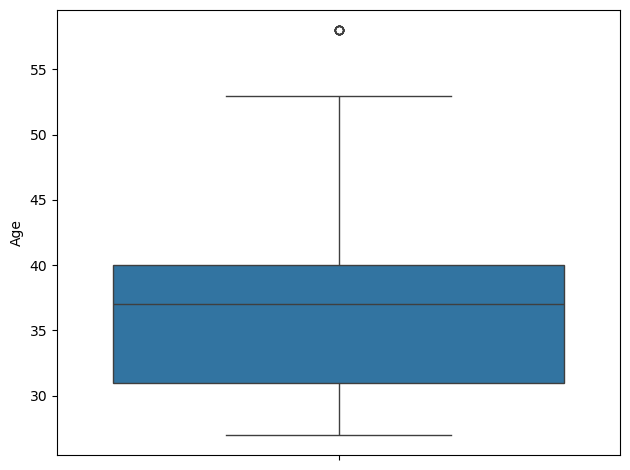

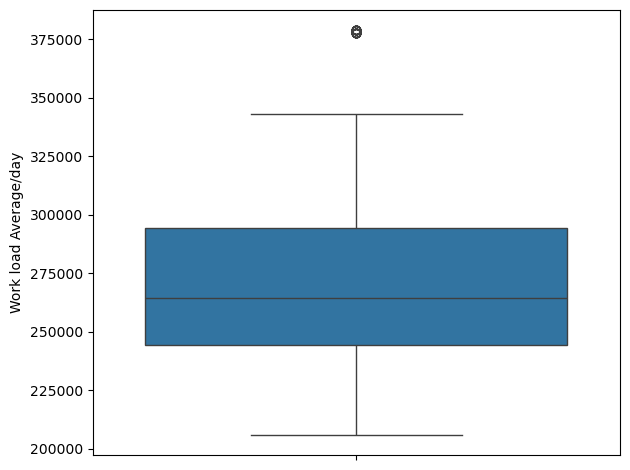

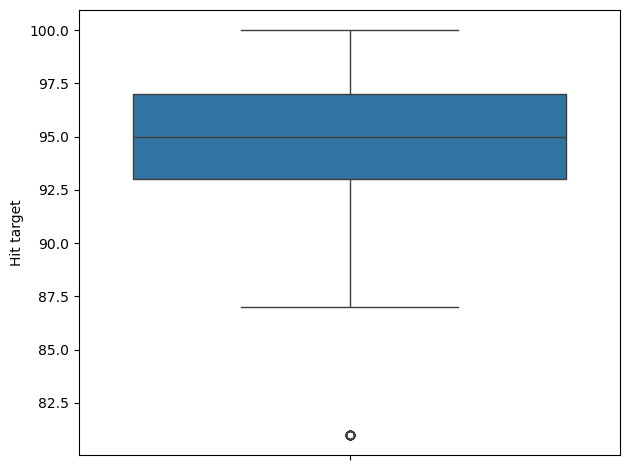

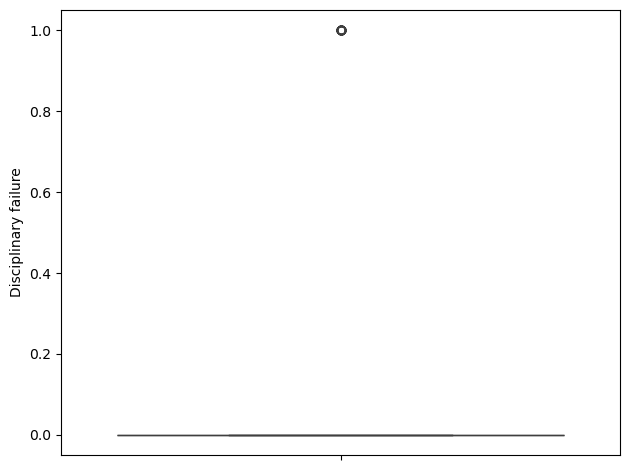

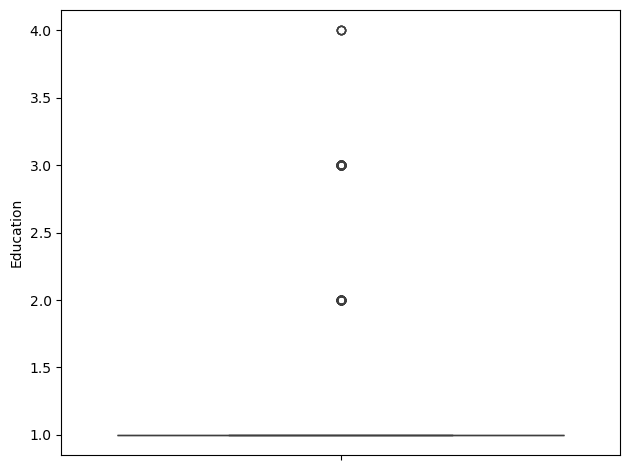

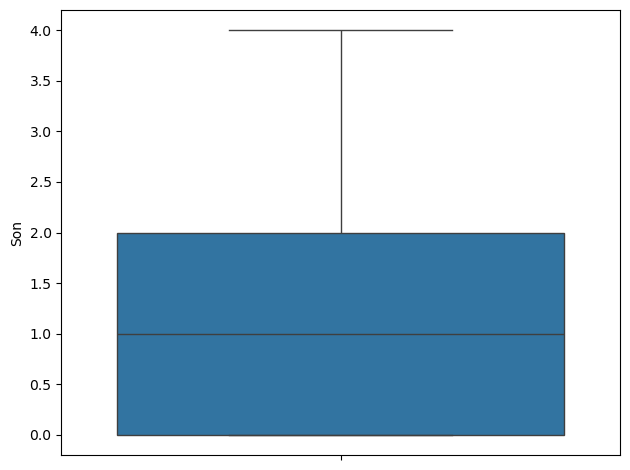

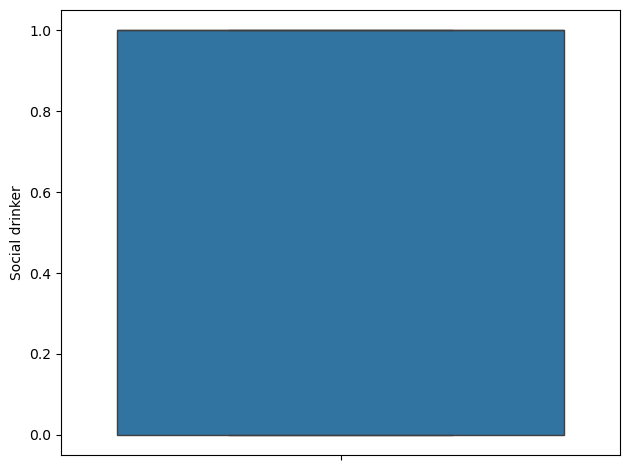

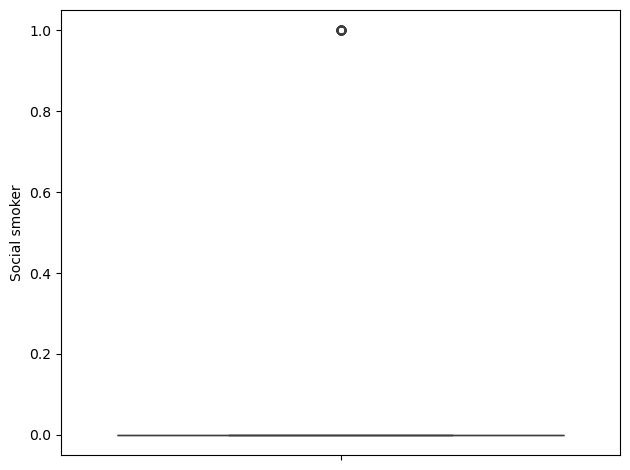

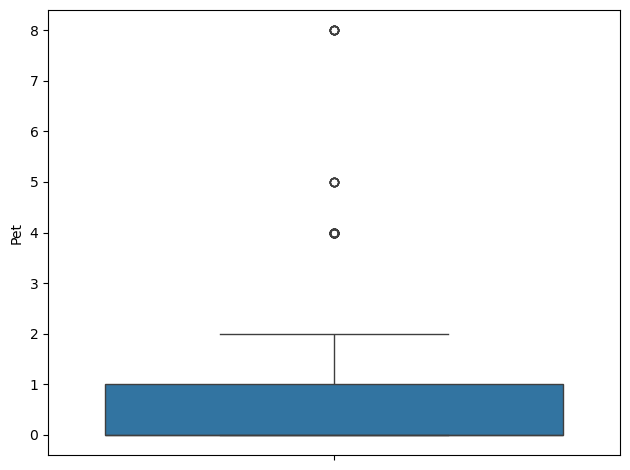

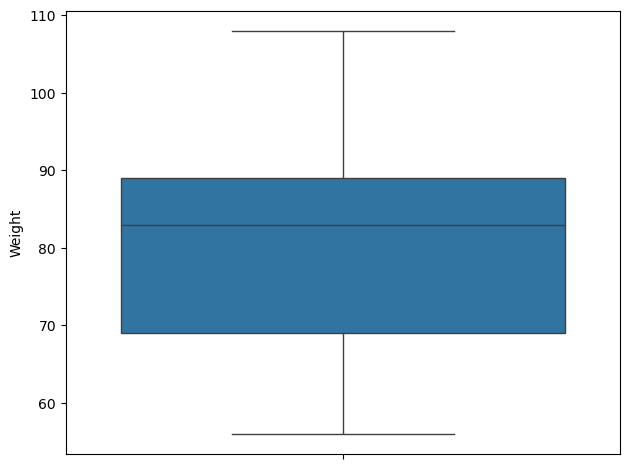

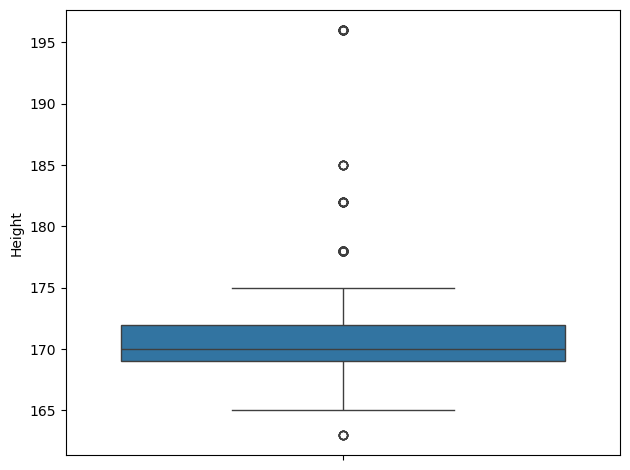

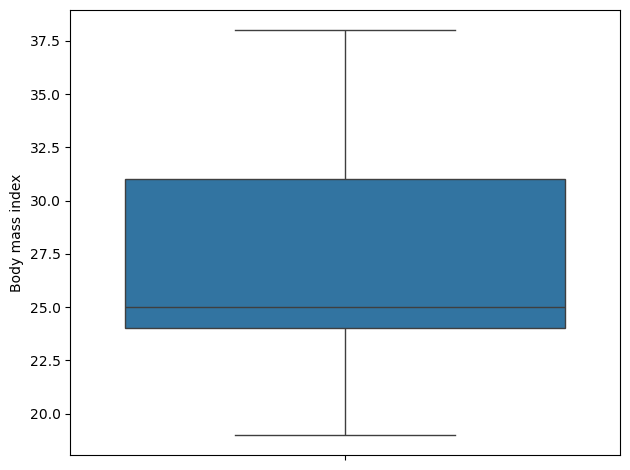

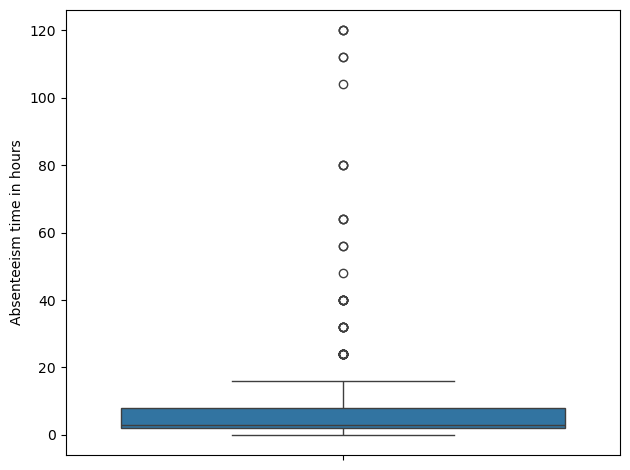

In [133]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()

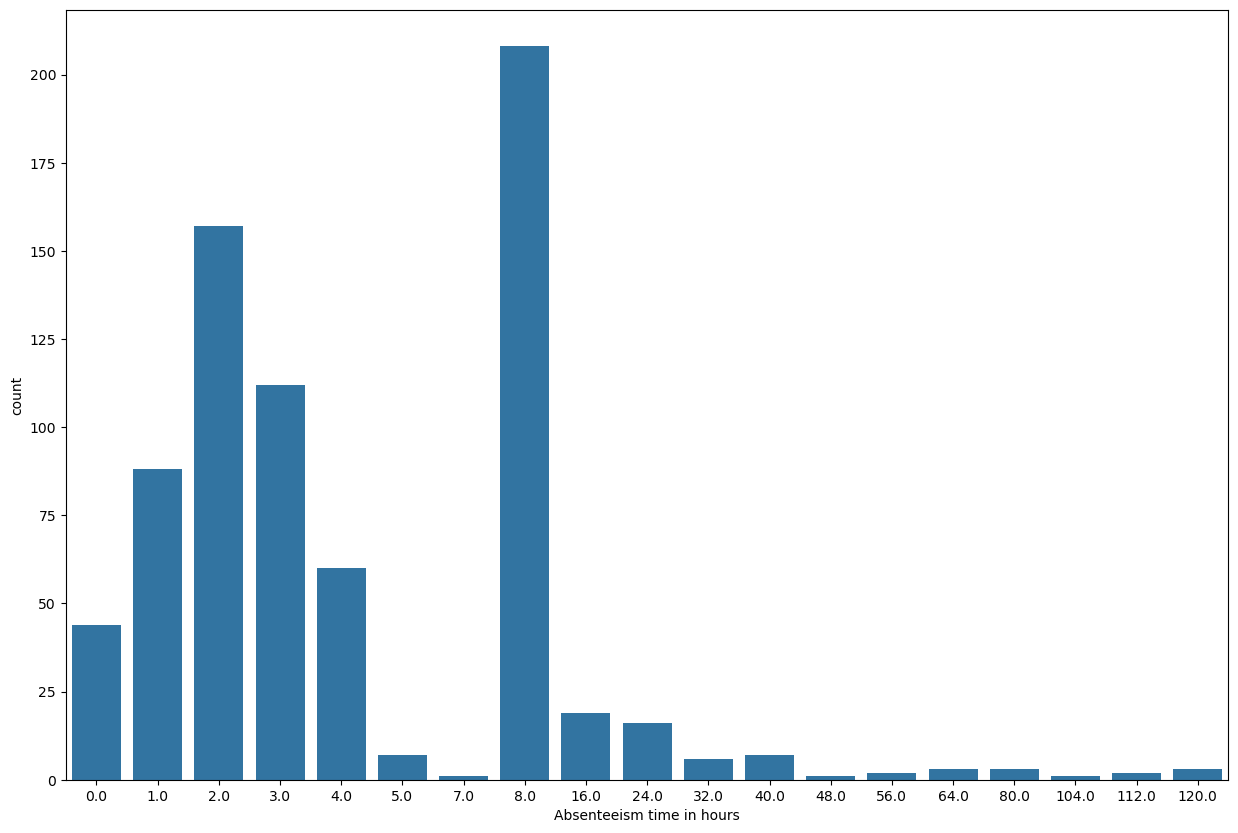

In [135]:
plt.figure(figsize = (15,10))
sns.countplot(x='Absenteeism time in hours',data=df)
plt.show()

In [137]:
abt=[]
for i in df['Absenteeism time in hours']:
    if i<8:
        abt.append(0)
    else:
        abt.append(1)
df['newabsent']=abt

In [139]:
bo=[]
for i in df['Reason for absence']:
    if i<20:
        bo.append(1)
    else:
        bo.append(0)
df['newReason']=bo

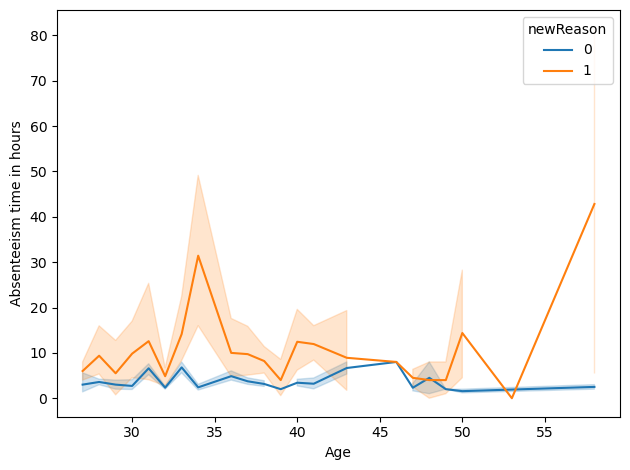

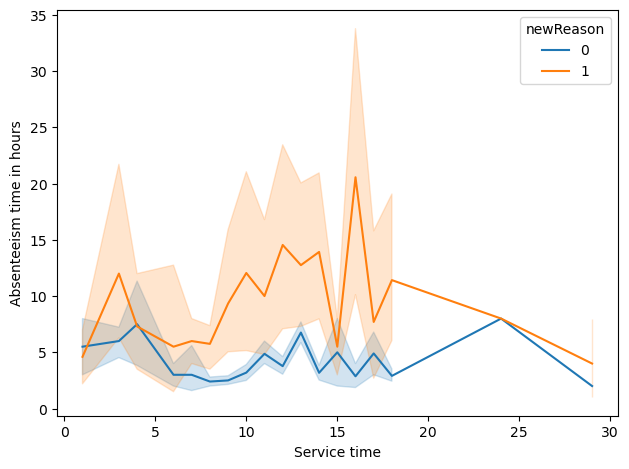

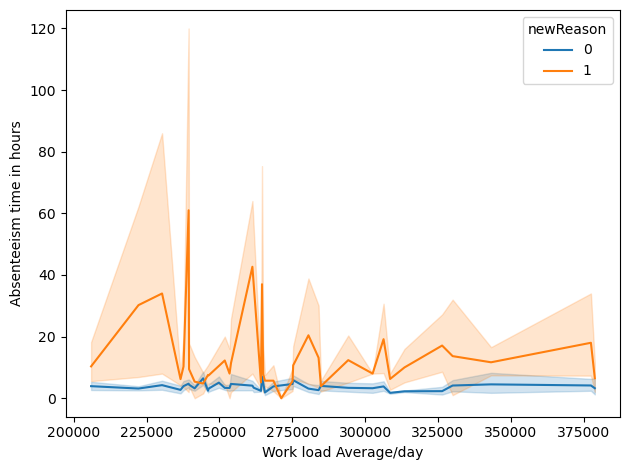

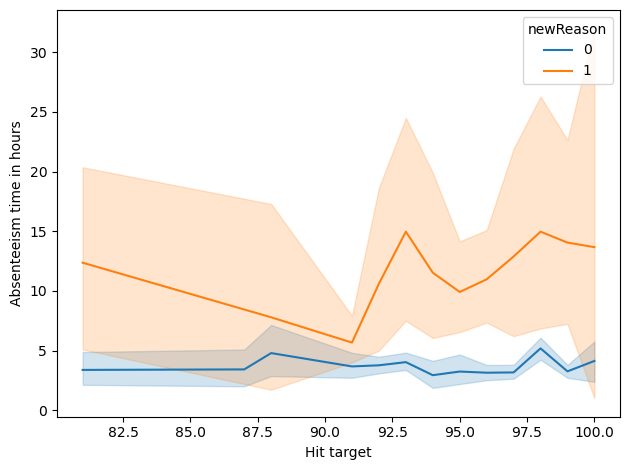

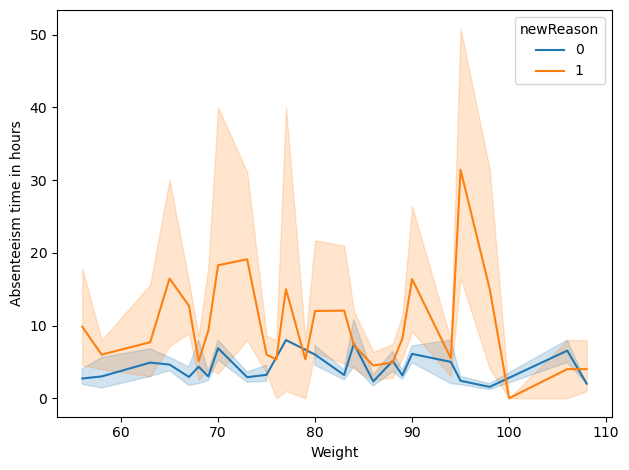

In [141]:
col=['Age','Service time','Work load Average/day','Hit target','Weight']
for i in col:
    sns.lineplot(x=i,y='Absenteeism time in hours',hue='newReason',data=df)
    plt.tight_layout()
    plt.show()

In [142]:
col=['Body mass index', 'Weight', 'Disciplinary failure','newReason','Age','Service time','Work load Average/day','Hit target']
new_df = df[col]

In [143]:
new_df.head()

Body mass index  Weight  Disciplinary failure  newReason  Age  \
0             30.0    90.0                   0.0          0   33   
1             31.0    98.0                   1.0          1   50   
2             31.0    89.0                   0.0          0   38   
3             24.0    68.0                   0.0          1   39   
4             30.0    90.0                   0.0          0   33   

   Service time  Work load Average/day  Hit target  
0          13.0                 239554        97.0  
1          18.0                 239554        97.0  
2          18.0                 239554        97.0  
3          14.0                 239554        97.0  
4          13.0                 239554        97.0

In [144]:
X = new_df
y = df['Absenteeism time in hours']

print(X.head())
y.head()

   Body mass index  Weight  Disciplinary failure  newReason  Age  \
0             30.0    90.0                   0.0          0   33   
1             31.0    98.0                   1.0          1   50   
2             31.0    89.0                   0.0          0   38   
3             24.0    68.0                   0.0          1   39   
4             30.0    90.0                   0.0          0   33   

   Service time  Work load Average/day  Hit target  
0          13.0                 239554        97.0  
1          18.0                 239554        97.0  
2          18.0                 239554        97.0  
3          14.0                 239554        97.0  
4          13.0                 239554        97.0  


0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=4)


from sklearn.model_selection import cross_val_score

models = {
    'ridge': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'mlp': MLPRegressor(),
    'bagging': BaggingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'svr': SVR(),
    'vote': VotingRegressor(estimators=[
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('mlp', MLPRegressor()),
    ('bagging', BaggingRegressor()),
    ('adaboost', AdaBoostRegressor()),
    ('svr', SVR())
])
}
def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores_r2 = cross_val_score(model, X_train, Y_train, cv=5, scoring=r2_scorer)
    scores_mse = cross_val_score(model, X_train, Y_train, cv=5, scoring=mse_scorer)
    print(f"Cross-validation R2 scores for {model_name}: {scores_r2}")
    print(f"Cross-validation MSE scores for {model_name}: {scores_mse}")
    print(f"Average cross-validation R2 score for {model_name}: {scores_r2.mean()}")
    print(f"Average cross-validation MSE score for {model_name}: {scores_mse.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation R2 scores for ridge: [ 0.14842536  0.14330026  0.09778123  0.13066701 -0.11727792]
Cross-validation MSE scores for ridge: [ -83.88355933 -244.27152726 -225.13384205 -162.8997281   -40.98397528]
Average cross-validation R2 score for ridge: 0.08057918971433889
Average cross-validation MSE score for ridge: -151.4345264019433
Running cross-validation for decision_tree...
Cross-validation R2 scores for decision_tree: [-2.4990792  -1.28030656 -0.01102859 -0.0225367  -3.30169585]
Cross-validation MSE scores for decision_tree: [-258.59367705 -561.75181139 -251.98351805 -191.72428967 -165.11678908]
Average cross-validation R2 score for decision_tree: -1.4229293779456458
Average cross-validation MSE score for decision_tree: -285.8340170484861
Running cross-validation for random_forest...
Cross-validation R2 scores for random_forest: [-0.44913339 -0.00987547  0.11371804  0.18406063 -1.60281088]
Cross-validation MSE scores for random_forest: [

## **Ridge Regression Model**

In [147]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Body mass index', 'Weight', 'Disciplinary failure','newReason','Age','Service time','Work load Average/day','Hit target']]
y = df['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha = 0.5)

ridge_model.fit(X_train, y_train)


y_pred = ridge_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) of model over Test dataset: ", mse)

input_features = [31.0, 98.0, 1.0, 1, 50, 18.0, 239554, 97.0]  
input_features = pd.DataFrame([input_features], columns=X.columns)
output = ridge_model.predict(input_features)
print("Output: ", output[0])

Mean Squared Error (MSE) of model over Test dataset:  102.29696566592914
Output:  4.995120803718118


In [148]:
import pickle

In [149]:
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

print("Model saved to ridge_model.pkl")

Model saved to ridge_model.pkl


In [150]:
with open('ridge_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

input_features = []
for i in ['Body mass index', 'Weight', 'Disciplinary failure','Reason','Age','Service time','Work load Average/day','Hit target']:
    input_features.append(input(i))
input_features = pd.DataFrame([input_features], columns=X.columns)
output = loaded_model.predict(input_features)
print("Output: ", output[0])

Body mass index 21
Weight 98
Disciplinary failure 0
Reason 1
Age 26
Service time 57
Work load Average/day 210365
Hit target 7


Output:  21.587683578561652


# **Model is affected by Spurious Correlation**